**Projeto 1**

## “Churn” de clientes em uma empresa de telecomunicações

 

Muitos clientes migram entre operadoras de telecomunicações devido a fatores diversos, sendo essa prática é conhecida como “Churn”. Com uma análise do banco de dados dos clientes é possível desenvolver um modelo de aprendizagem de máquina que seja capaz de prever os clientes que são mais propensos a migrar de operadora e assim oferece-los promoções diferenciadas visando retê-los.

Uma empresa de telecomunicações está preocupada com o número de clientes que trocam seus negócios de telefonia fixa por concorrentes a cabo. Eles precisam entender quem está saindo. Imagine que você é um analista dessa empresa e precisa descobrir quem está saindo e por quê. 

 
**O que o Dataset nos informa:**

- Clientes que saíram no último mês - a coluna é chamada Churn, esse é o valor a ser previsto no modelo 
- Serviços para os quais cada cliente se inscreveu:  telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico, streaming de TV e filmes. 
- Informações da conta do cliente: Informações da conta do cliente: há quanto tempo eles são clientes (tenure), contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais.  
- Informações demográficas sobre clientes: sexo, faixa etária e se têm parceiros e dependentes 

**O que você deve fazer:**

- [ ] Estudar cada feature para a melhor compreensão dos resultados 
- [ ] Faça uma análise exploratória dos dados 
- [ ] Caso exista, substituir cada item faltantes por um valor apropriado 
- [ ] Fazer o particionamento dos dados em treinamento (80%) e teste (20%) 
- [ ] Substituir os dados categóricos em texto para numéricos 
- [ ] Treinar e validar uma árvore de decisão e avaliar a precisão do modelo 
- [ ] Mostrar a matriz de confusão para o modelo 
Instruções: 

Faça o trabalho em 5 grupos 
O prazo para a entrega do trabalho é 27/09/2022 através de uma tarefa disponibilizada no Microsoft Teams.  
As equipes deverão apresentar o trabalho na data da entrega, sendo que a apresentação do trabalho contará como nota individual. 

In [1]:
# For performance improvement on sklearn
!pip install scikit-learn-intelex
# For resampling
!pip install imblearn
# Para evitar erro 'Transformer cat (type OrdinalEncoder) does not provide get_feature_names_out'
!pip install --upgrade scikit-learn
# Para evitar erro 'AxesSubplot' object has no attribute 'bar_label'
!pip install --upgrade matplotlib

In [2]:
# Para tratamento dos dados
import pandas as pd
import numpy as np

# Para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

# Para calcular métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Acelerar processamento
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Tratando a coluna TotalCharges**

In [6]:
def total_charges_to_float(df_, to_print=False):
    
    if to_print:
        # Verificando porcentagem de valores nulos
        na_perc = (df['TotalCharges'].str.len() == 0).sum()/len(df)
        print(f'Porcentagem de valores nulos na coluna "TotalCharges": {na_perc*100:.3f}%')

    # Removendo espaços
    df_['TotalCharges'] = df_['TotalCharges'].str.strip()
    # Encontrando linhas nulas
    na_rows = df_['TotalCharges'].str.len() == 0
    # Substituindo linhas nulas por NaNs
    df_.loc[na_rows, 'TotalCharges'] = np.nan
    
    # Convertendo para float
    df_['TotalCharges'] = df_['TotalCharges'].astype(np.float64)
    
    return df_

In [7]:
df = total_charges_to_float(df)

**Verificando valores nulos**

In [8]:
# Verificando qtd global de valores nulos
df.isna().sum().sum()

11

In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Verificando linhas duplicadas**

In [11]:
df.duplicated().sum()

0

**Verificando distribuição dos dados do target**

In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Como podemos ver, as classes do nosso target estão **desbalanceadas**, precisaremos tratar isso posteriormente para atingirmos uma maior performance nos nossos modelos

# Pré-processamento

In [13]:
# Transformando target em numérico
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

### Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X, y = df.drop('Churn', axis=1), df['Churn']

In [16]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.8)

### Transformando features

**Verificando cardinalidade das colunas categóricas**

In [17]:
# Verificando cardinalidade das colunas categóricas
cadinalidade_cat = {col: X_train_full[col].nunique() for col in X_train_full.select_dtypes('object').columns}
cadinalidade_cat

{'customerID': 5634,
 'gender': 2,
 'Partner': 2,
 'Dependents': 2,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4}

In [18]:
# Para criar pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
# Para Enconding
from sklearn.preprocessing import OrdinalEncoder
# Para Scaling
from sklearn.preprocessing import StandardScaler
# Para Input de valores nulos
from sklearn.impute import SimpleImputer

In [20]:
def gen_pipeline(cat_cols_, numeric_cols_, cat_transformer=OrdinalEncoder(), numeric_imputer_strategy='mean'):
    # Transformador Numérico
    numeric_transformer = Pipeline(
        steps=[
            ('inputing', SimpleImputer(strategy=numeric_imputer_strategy)),
            ('scaling', StandardScaler())
        ])
    
    # Preprocessing pipeline
    preprocessing = ColumnTransformer(transformers=[
        ('cat', cat_transformer, cat_cols_),
        ('num', numeric_transformer, numeric_cols_)
    ])
    
    return preprocessing

In [21]:
# Selecionando as colunas categóricas de baixa cardinalidade
cat_cols = [col for col in X_train_full.select_dtypes('object') if X_train_full[col].nunique() < 10]

# Selecionando as colunas numéricas
numeric_cols = X_train_full._get_numeric_data().columns.to_list()

In [22]:
preprocessing = gen_pipeline(cat_cols, numeric_cols)

# Árvore de Decisão

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree_model = DecisionTreeClassifier(random_state=42)

In [25]:
X_train = preprocessing.fit_transform(X_train_full)

In [26]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
X_test = preprocessing.transform(X_test_full)

In [28]:
y_pred_tree = tree_model.predict(X_test)

In [29]:
def plot_confusion_matrix(y_test, y_pred, y_categories, pos_label=1):
    """
    Plot confusion matrix e classification report
    """
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred, pos_label=pos_label)
    rc = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    plt.figure(figsize=(15,8))
    plt.title('Matriz de confusão', weight='bold').set_fontsize(30)
    sns.heatmap(
        data=confusion_matrix(y_test, y_pred),
        annot=True,
        fmt='',
        cmap='Blues',
        xticklabels=y_categories,
        yticklabels=y_categories
    )
    plt.xlabel(
        ('Predicted value\n\n'
         f'accuracy = {acuracia:.3f}\n'
         f'precision = {precisao:.3f}\n'
         f'recall = {rc:.3f}\n'
         f'f1 = {f1:.3f}')
    )
    plt.ylabel('True value')
    plt.show()

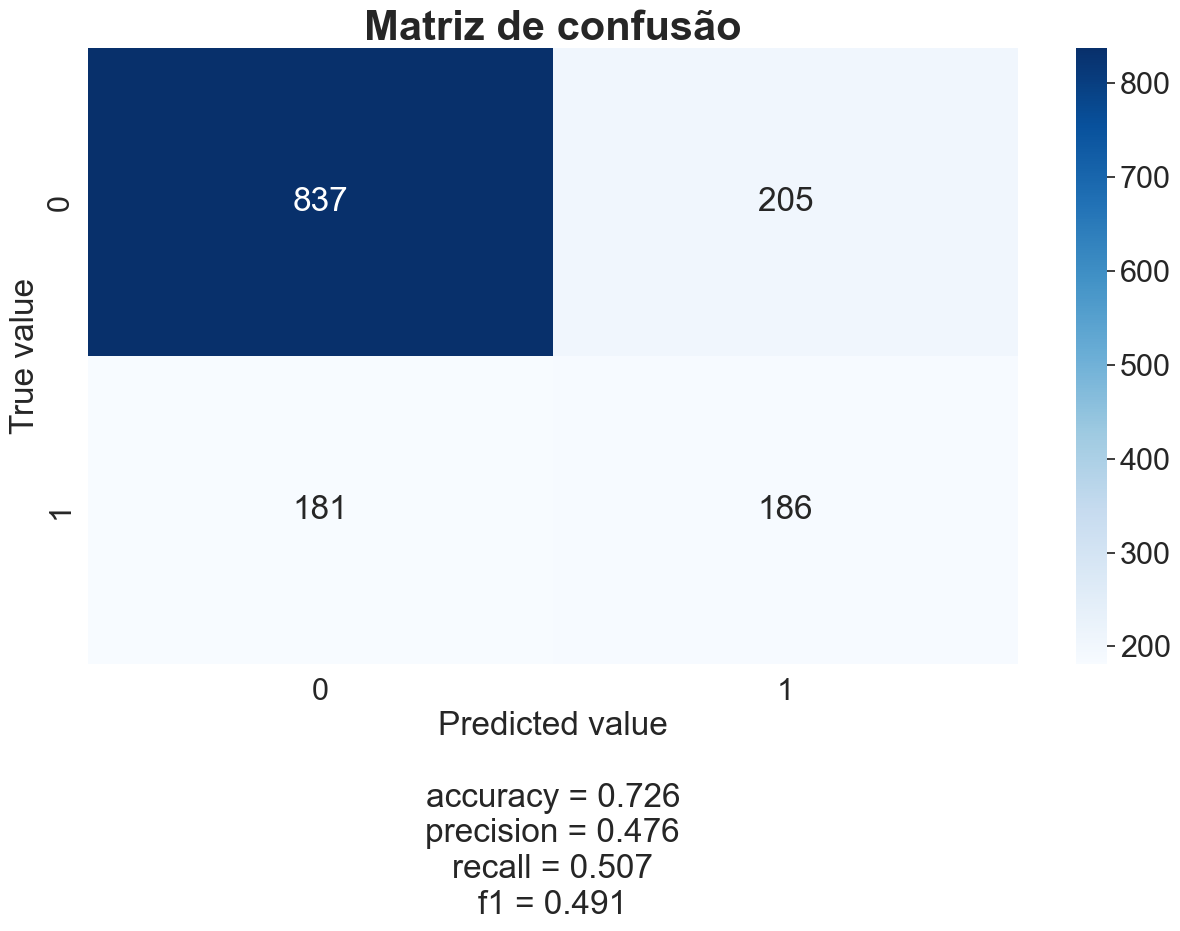

In [30]:
plot_confusion_matrix(y_test, y_pred_tree, tree_model.classes_)

In [31]:
# from dtreeviz.trees import dtreeviz # remember to load the package

# viz = dtreeviz(tree_model, X_train, y_train,
#                 target_name="Churn",
#                 feature_names=X_train_full.columns,
#                 class_names=['No', 'Yes'])

# viz

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier(random_state=42)

In [34]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred_rf = rf_model.predict(X_test)

In [36]:
def gen_feature_importances(model_, feature_names):
    """
    Generate feature importances DataFrame
    
    Parameters
    ----------
    model_: Scikit-learn model
    
    feature_names: list of str
    
    Returns
    -------
    pd.DataFrame
    """
    return (pd.DataFrame({'feature': feature_names, 'importância': model_.feature_importances_})
                    .sort_values(by=['importância'], ascending=False)
                   .set_index('feature'))

In [37]:
gen_feature_importances(rf_model, preprocessing.get_feature_names_out())

,importância
feature,
num__MonthlyCharges,0.194265
num__TotalCharges,0.192613
num__tenure,0.159595
cat__Contract,0.070271
cat__PaymentMethod,0.048268
cat__TechSupport,0.047069
cat__OnlineSecurity,0.043367
cat__gender,0.026901
cat__OnlineBackup,0.025768


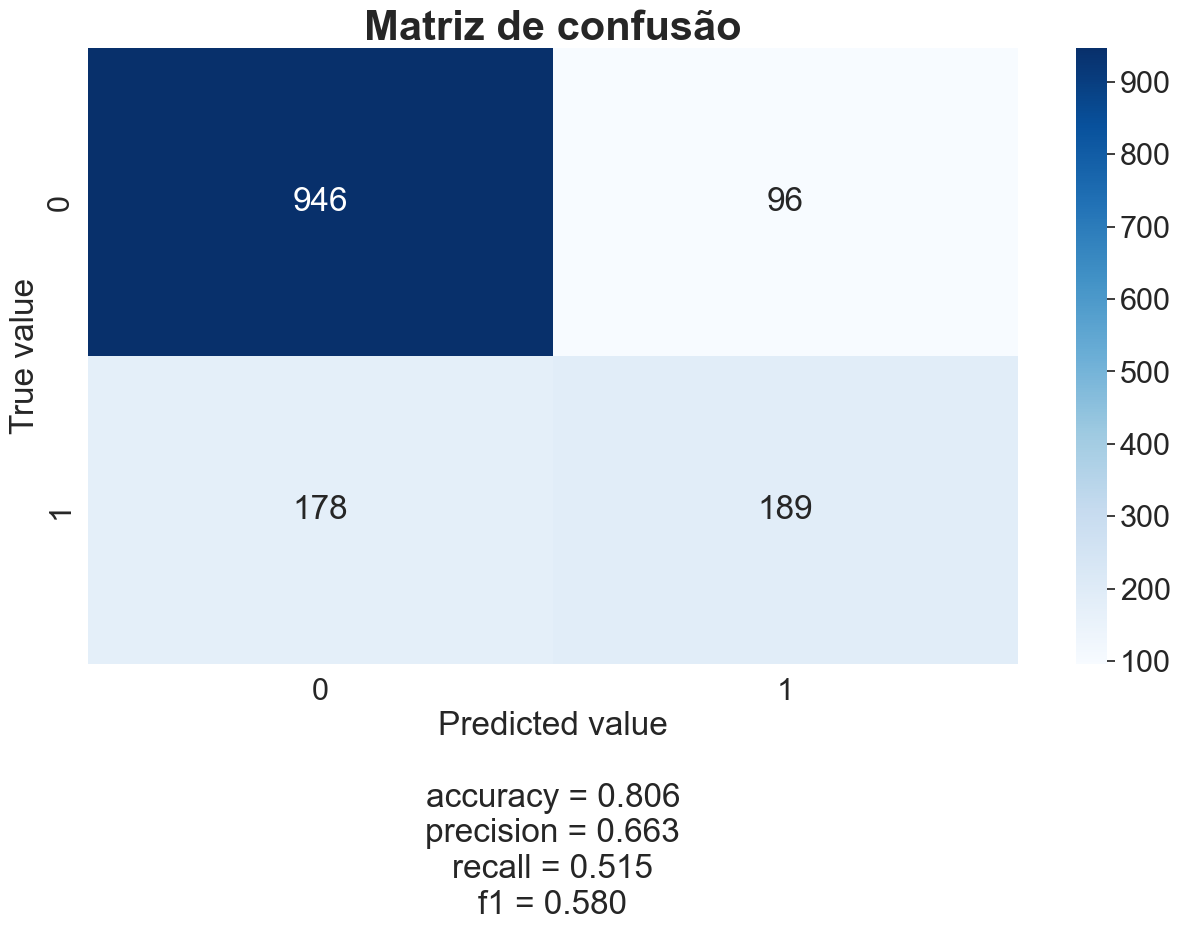

In [38]:
plot_confusion_matrix(y_test, y_pred_rf, rf_model.classes_)

# Aplicando Undersampling e Oversampling

In [39]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

## Oversampling

In [40]:
def apply_oversampling(X_train_, y_train_, **kwargs):
    ros = RandomOverSampler(**kwargs)
    X_train_oversam, y_train_oversam = ros.fit_resample(X_train_, y_train_)
    return X_train_oversam, y_train_oversam

In [41]:
X_train_oversam, y_train_oversam = apply_oversampling(X_train, y_train, random_state=42)

In [42]:
def plot_sampling_comparison(y, y_resampled, resample_label, title=''):
    fig, axs = plt.subplots(1, 2, constrained_layout=True, sharey=True,figsize=(12,6), dpi=300)
    if title:
        fig.suptitle(title, weight='bold')
    sns.countplot(x=y, ax=axs[0], palette=['#6E7DC3', '#F7735E', '#3B499B', '#BD4120'])
    axs[0].title.set_text('Original')
    sns.countplot(x=y_resampled, ax=axs[1], palette=['#6E7DC3', '#F7735E', '#3B499B', '#BD4120'])
    axs[1].title.set_text(resample_label)

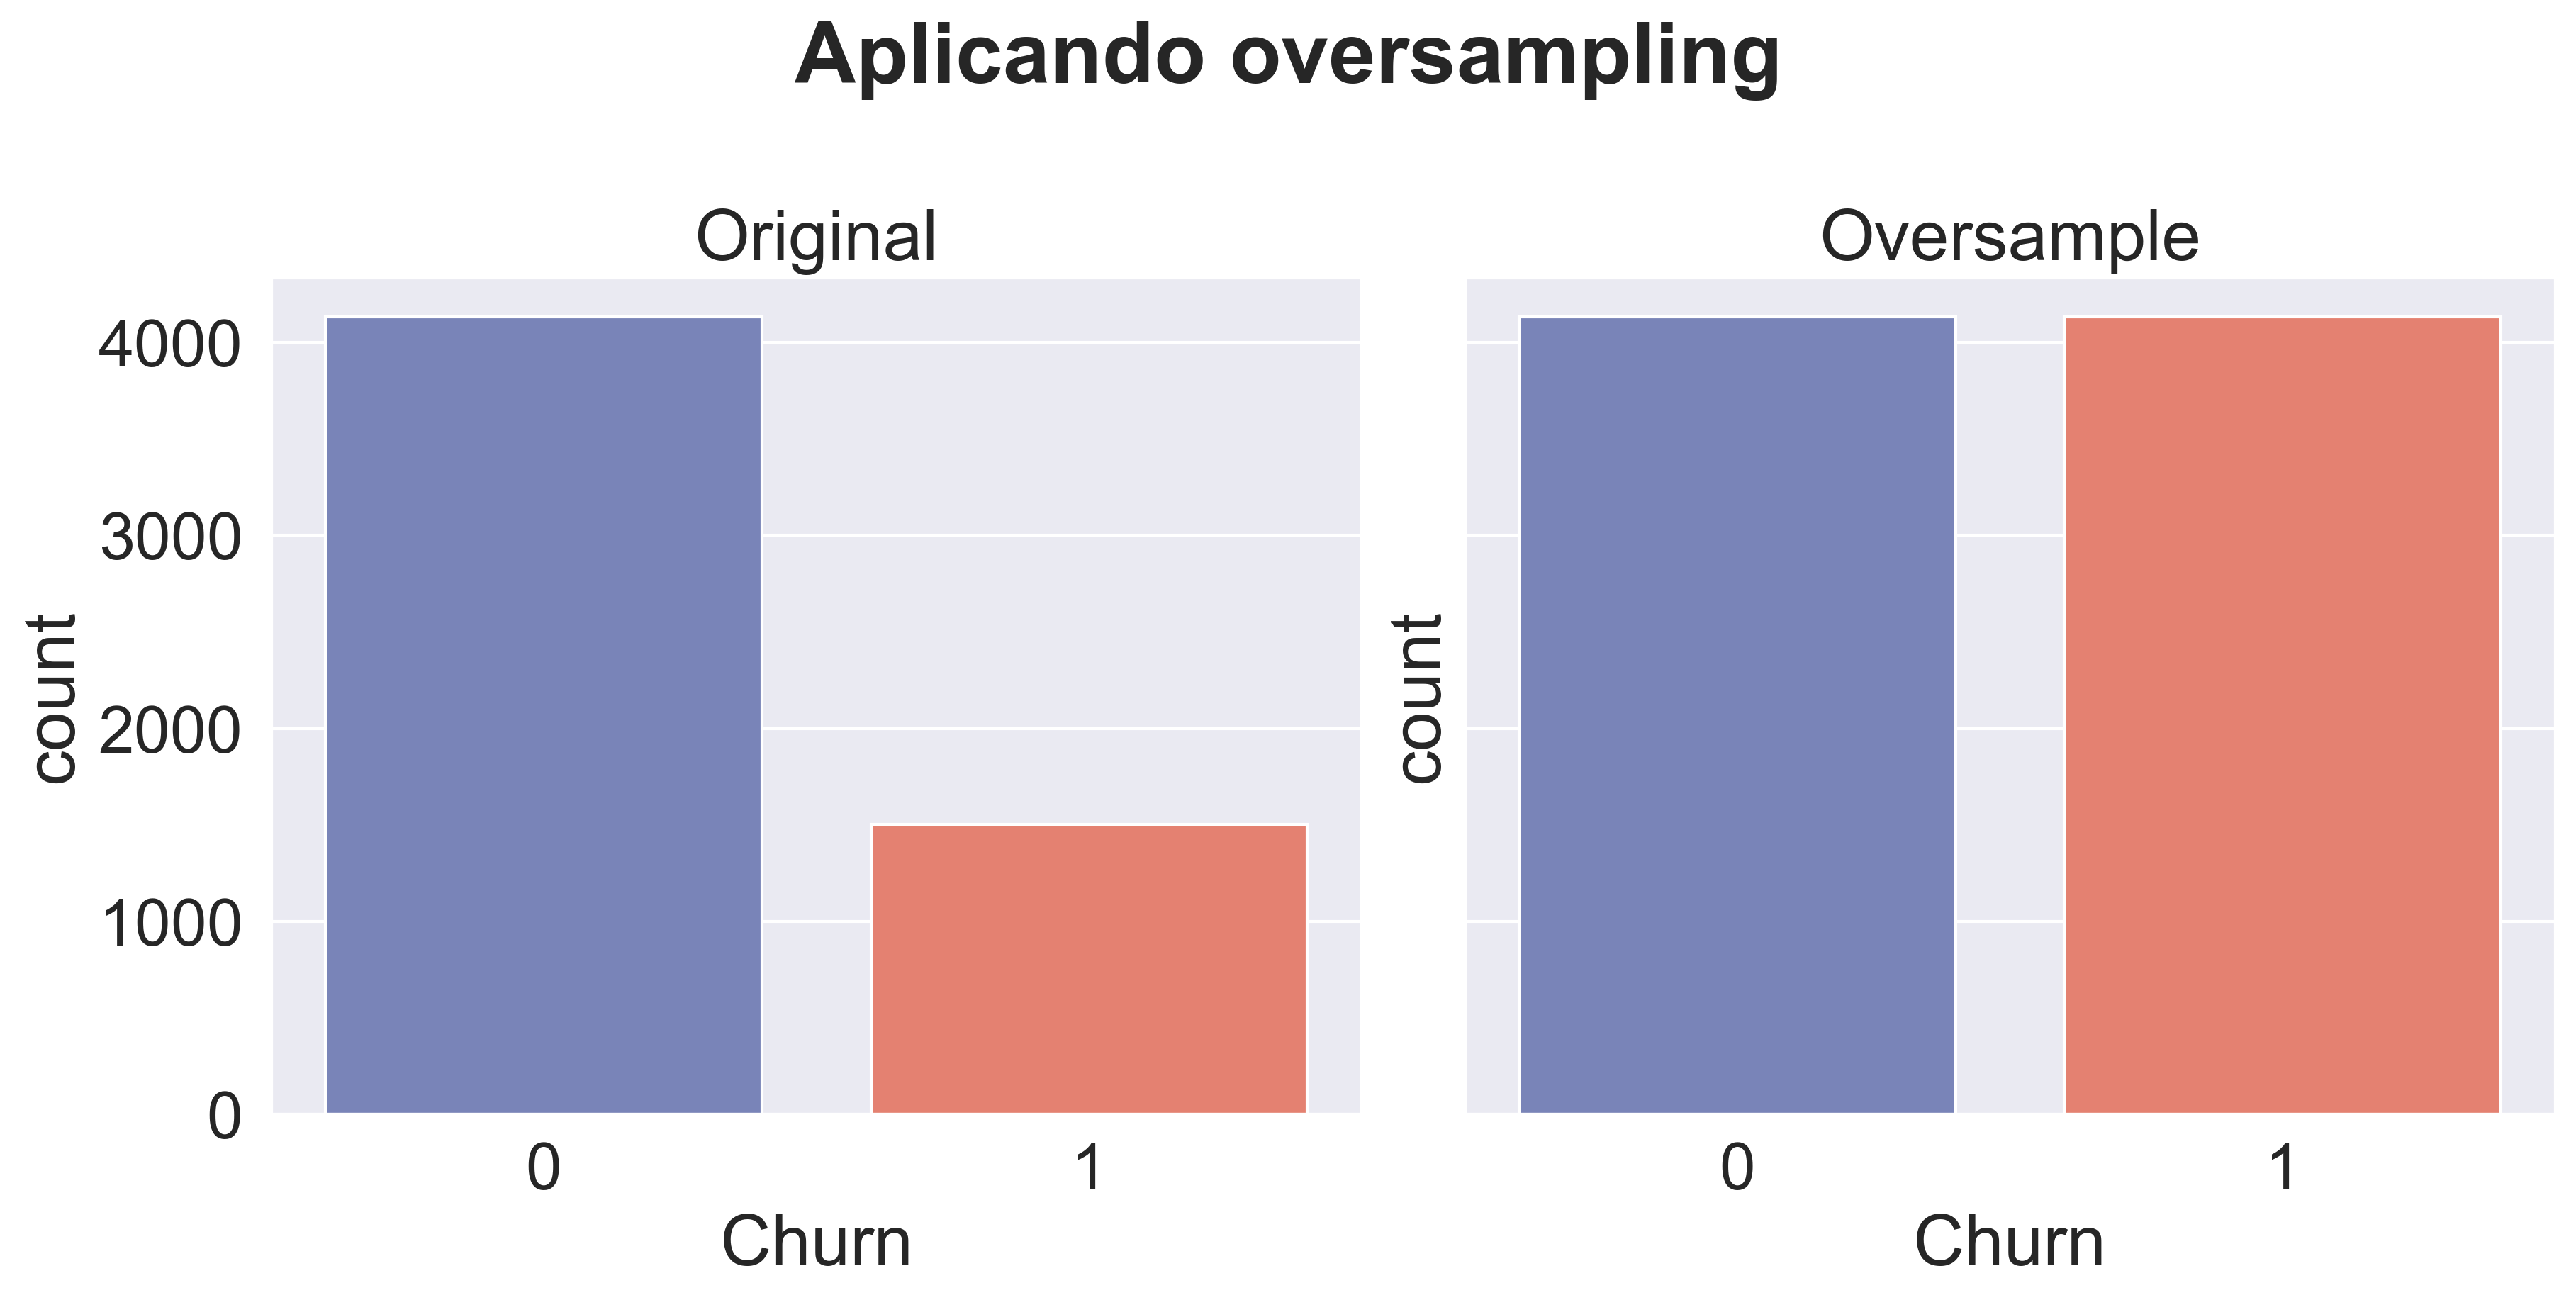

In [43]:
plot_sampling_comparison(y_train, y_train_oversam, resample_label='Oversample', title='Aplicando oversampling\n')

### Treinando Floresta Aleatória com oversampling

In [44]:
rf_model_over = RandomForestClassifier(random_state=42, oob_score=True)

In [45]:
rf_model_over.fit(X_train_oversam, y_train_oversam)

RandomForestClassifier(oob_score=True, random_state=42)

In [46]:
y_pred_over = rf_model_over.predict(X_test)

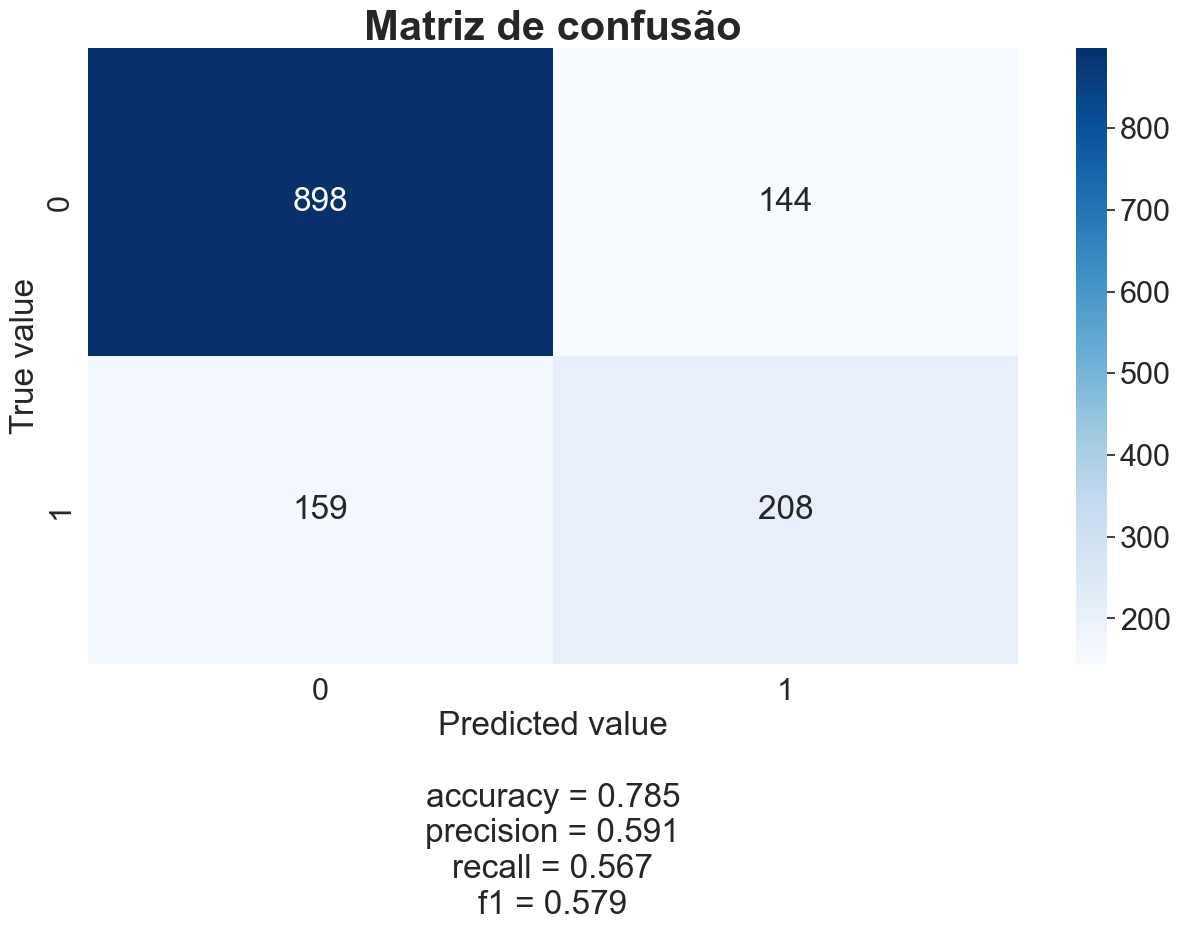

In [47]:
plot_confusion_matrix(y_test, y_pred_over, rf_model_over.classes_)

In [48]:
rf_model_over.oob_score_

0.9082768635043562

## Undersampling

In [49]:
def apply_undersampling(X_train_, y_train_, **kwargs):
    rus = RandomUnderSampler(**kwargs)
    X_train_undersam, y_train_undersam = rus.fit_resample(X_train, y_train)
    return X_train_undersam, y_train_undersam

In [50]:
X_train_undersam, y_train_undersam = apply_undersampling(X_train, y_train, random_state=42)

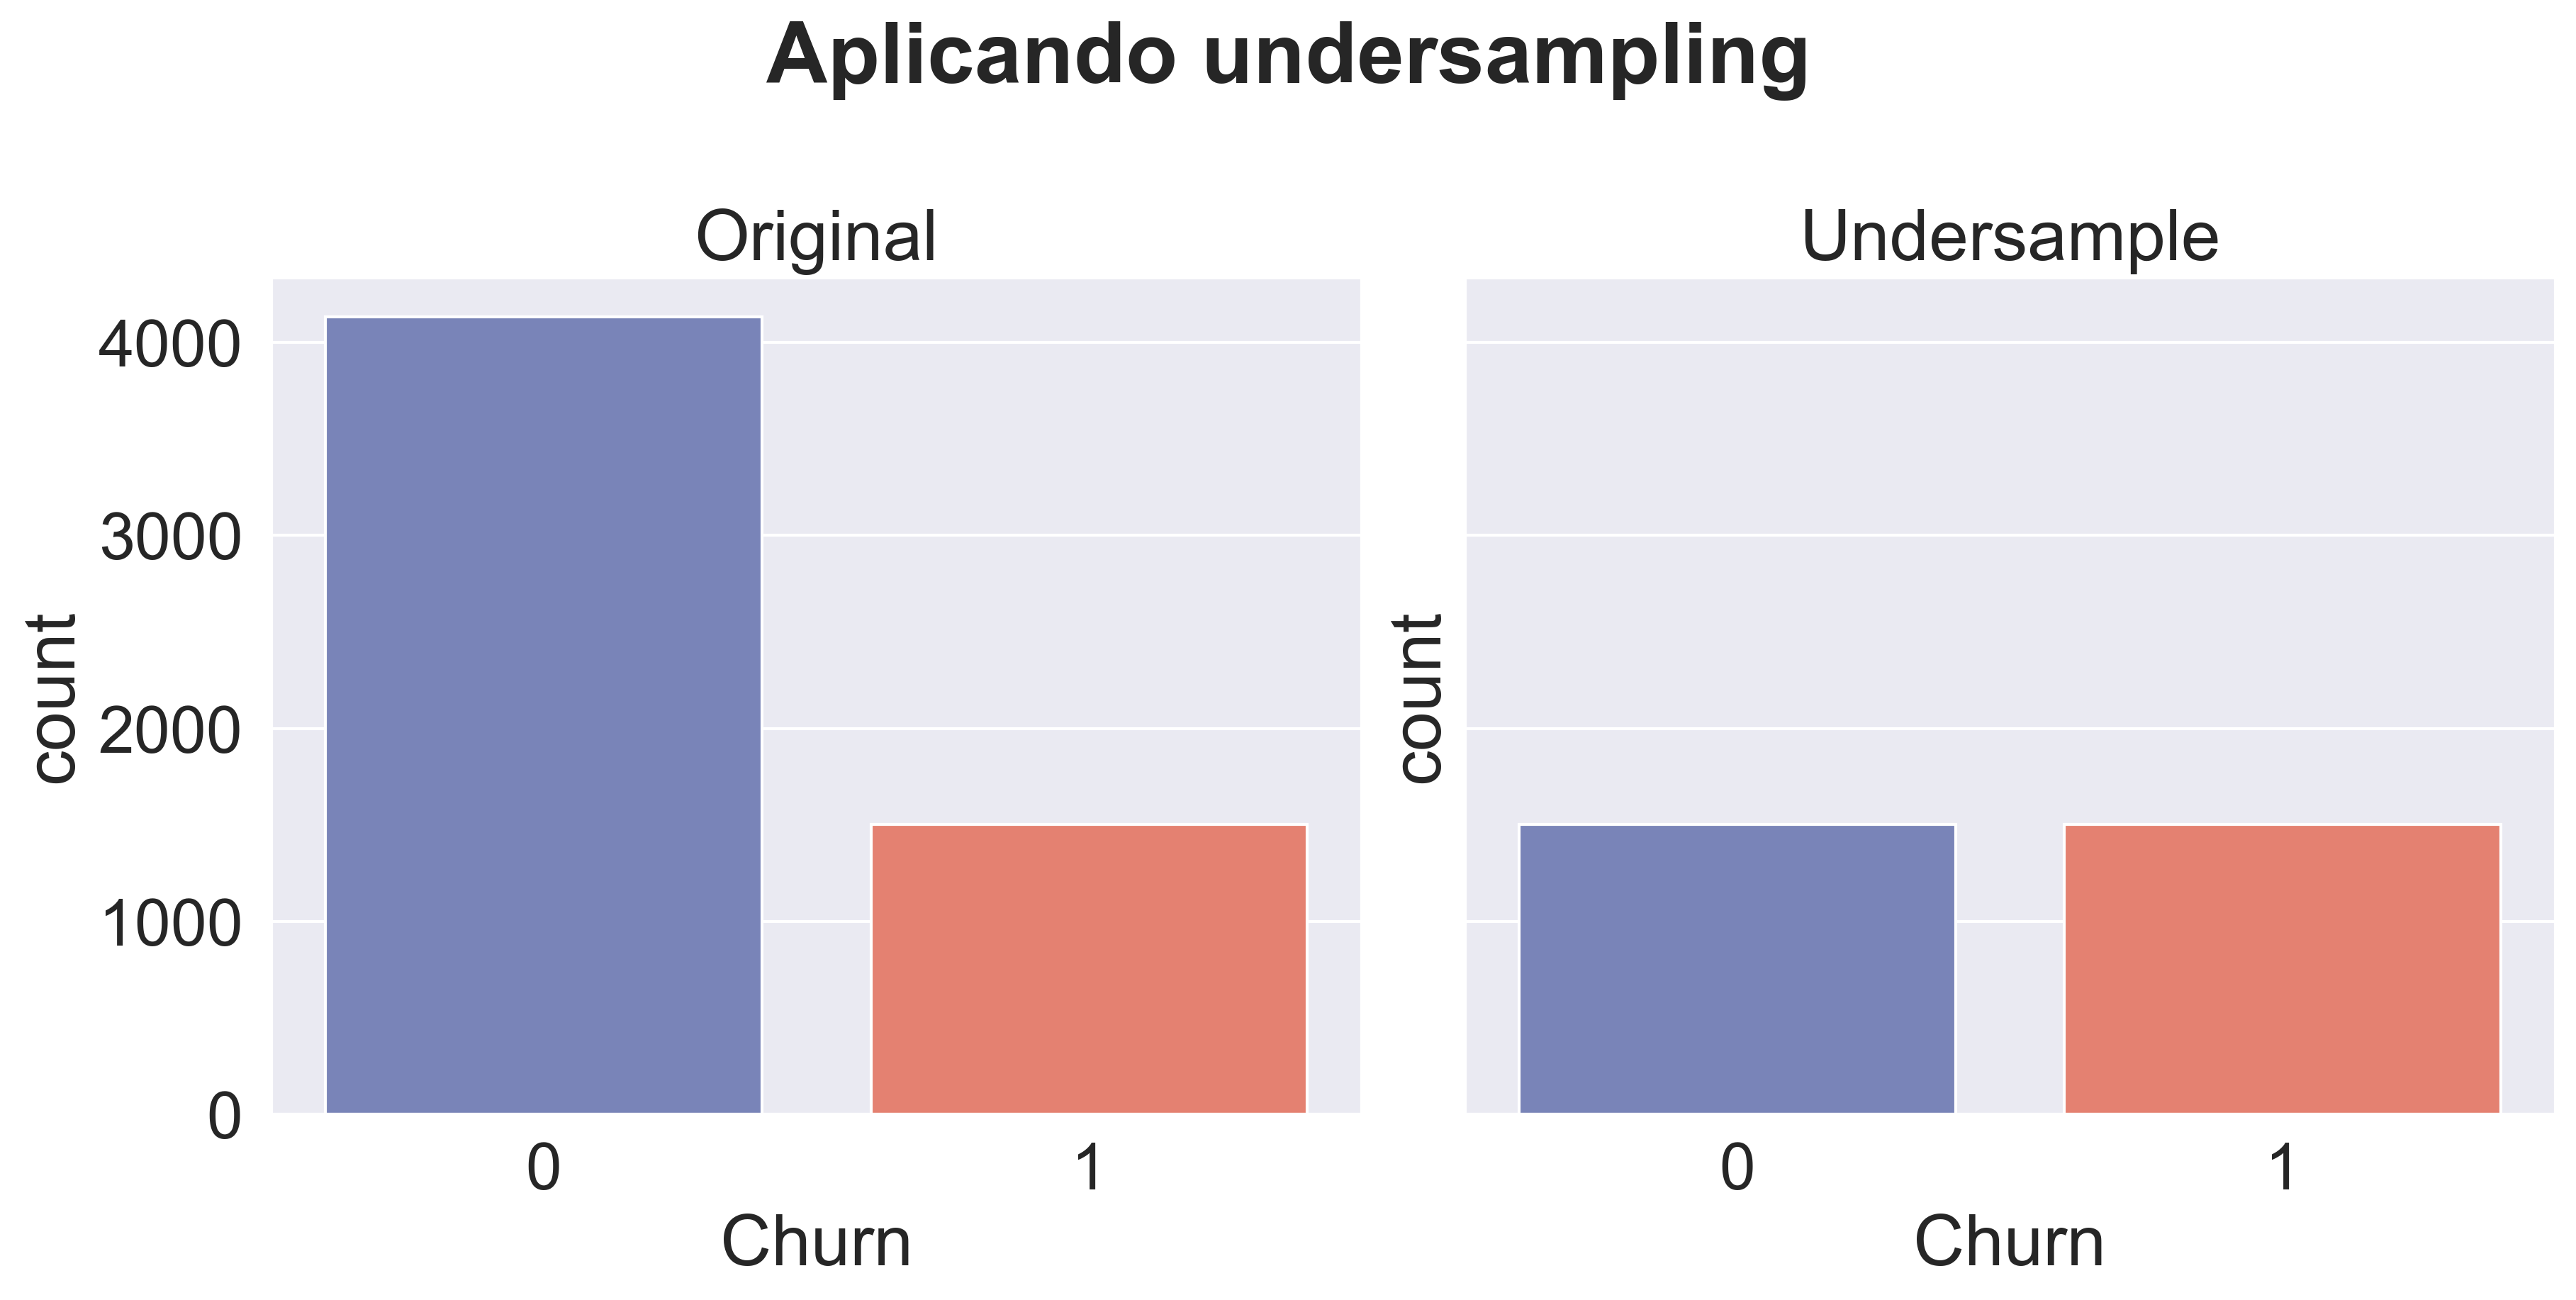

In [51]:
plot_sampling_comparison(y_train, y_train_undersam, resample_label='Undersample', title='Aplicando undersampling\n')

### Treinando Floresta Aleatória com undersampling

In [52]:
model_rf_under = RandomForestClassifier(random_state=42)

In [53]:
model_rf_under.fit(X_train_undersam, y_train_undersam)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_under = model_rf_under.predict(X_test)

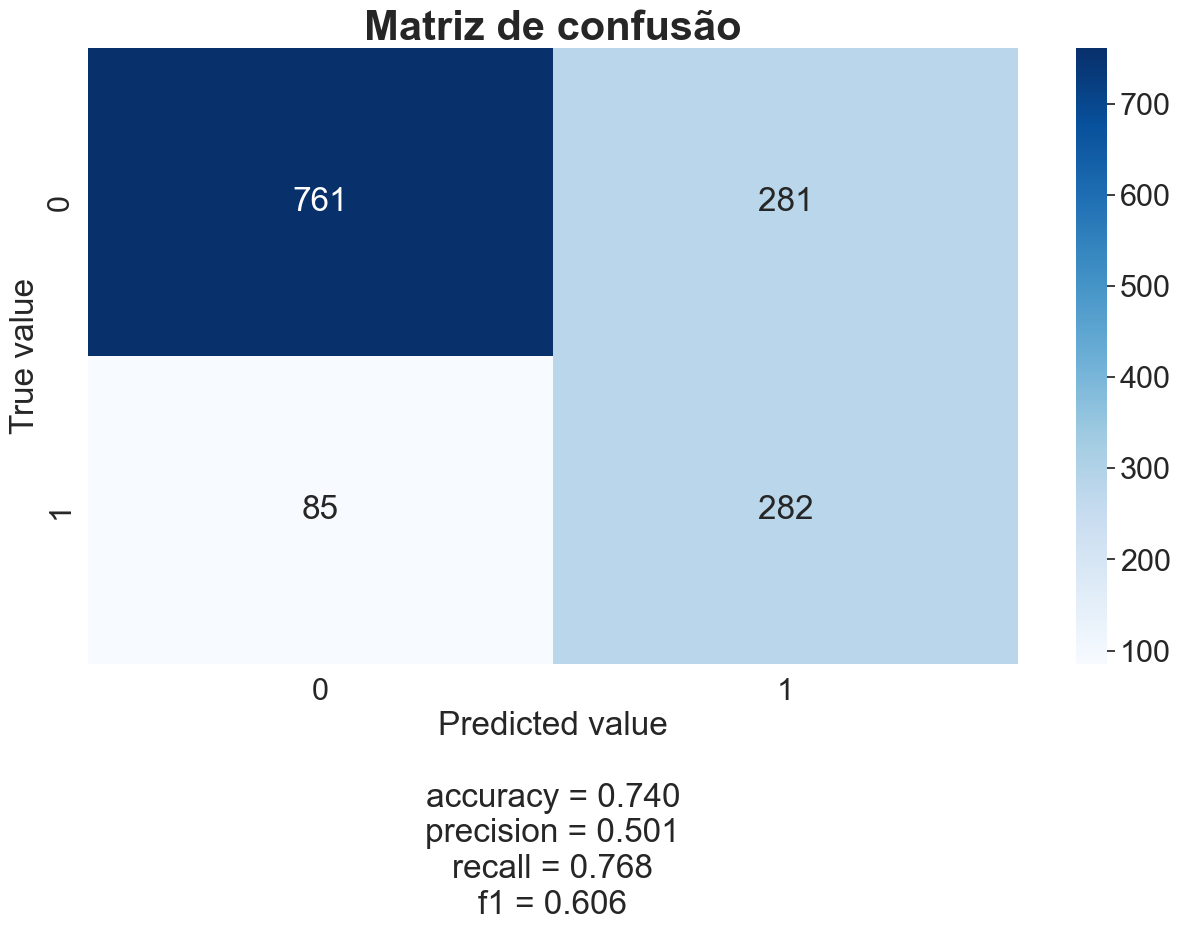

In [55]:
plot_confusion_matrix(y_test, y_pred_under, model_rf_under.classes_)

In [56]:
from sklearn import metrics

In [57]:
def calcululate_metrics(y_test_, y_pred_, pos_label=1):
    return (
    round(metrics.accuracy_score(y_test_, y_pred_), 3),
    round(metrics.precision_score(y_test_, y_pred_, pos_label=pos_label), 3),
    round(metrics.recall_score(y_test_, y_pred_, pos_label=pos_label), 3),
    round(metrics.f1_score(y_test_, y_pred_, pos_label=pos_label), 3)
    )

In [58]:
metrics_list = ['accuracy', 'precision', 'recall', 'f1']
over_result = calcululate_metrics(y_test, y_pred_over)
under_result = calcululate_metrics(y_test, y_pred_under)
default_result = calcululate_metrics(y_test, y_pred_rf)

In [59]:
resampling_results = pd.DataFrame(
    {
        'Resample': ['oversample']*4 + ['undersample']*4 + ['default']*4,
        'Metric': metrics_list*3,
        'Score': over_result + under_result + default_result
    }
)

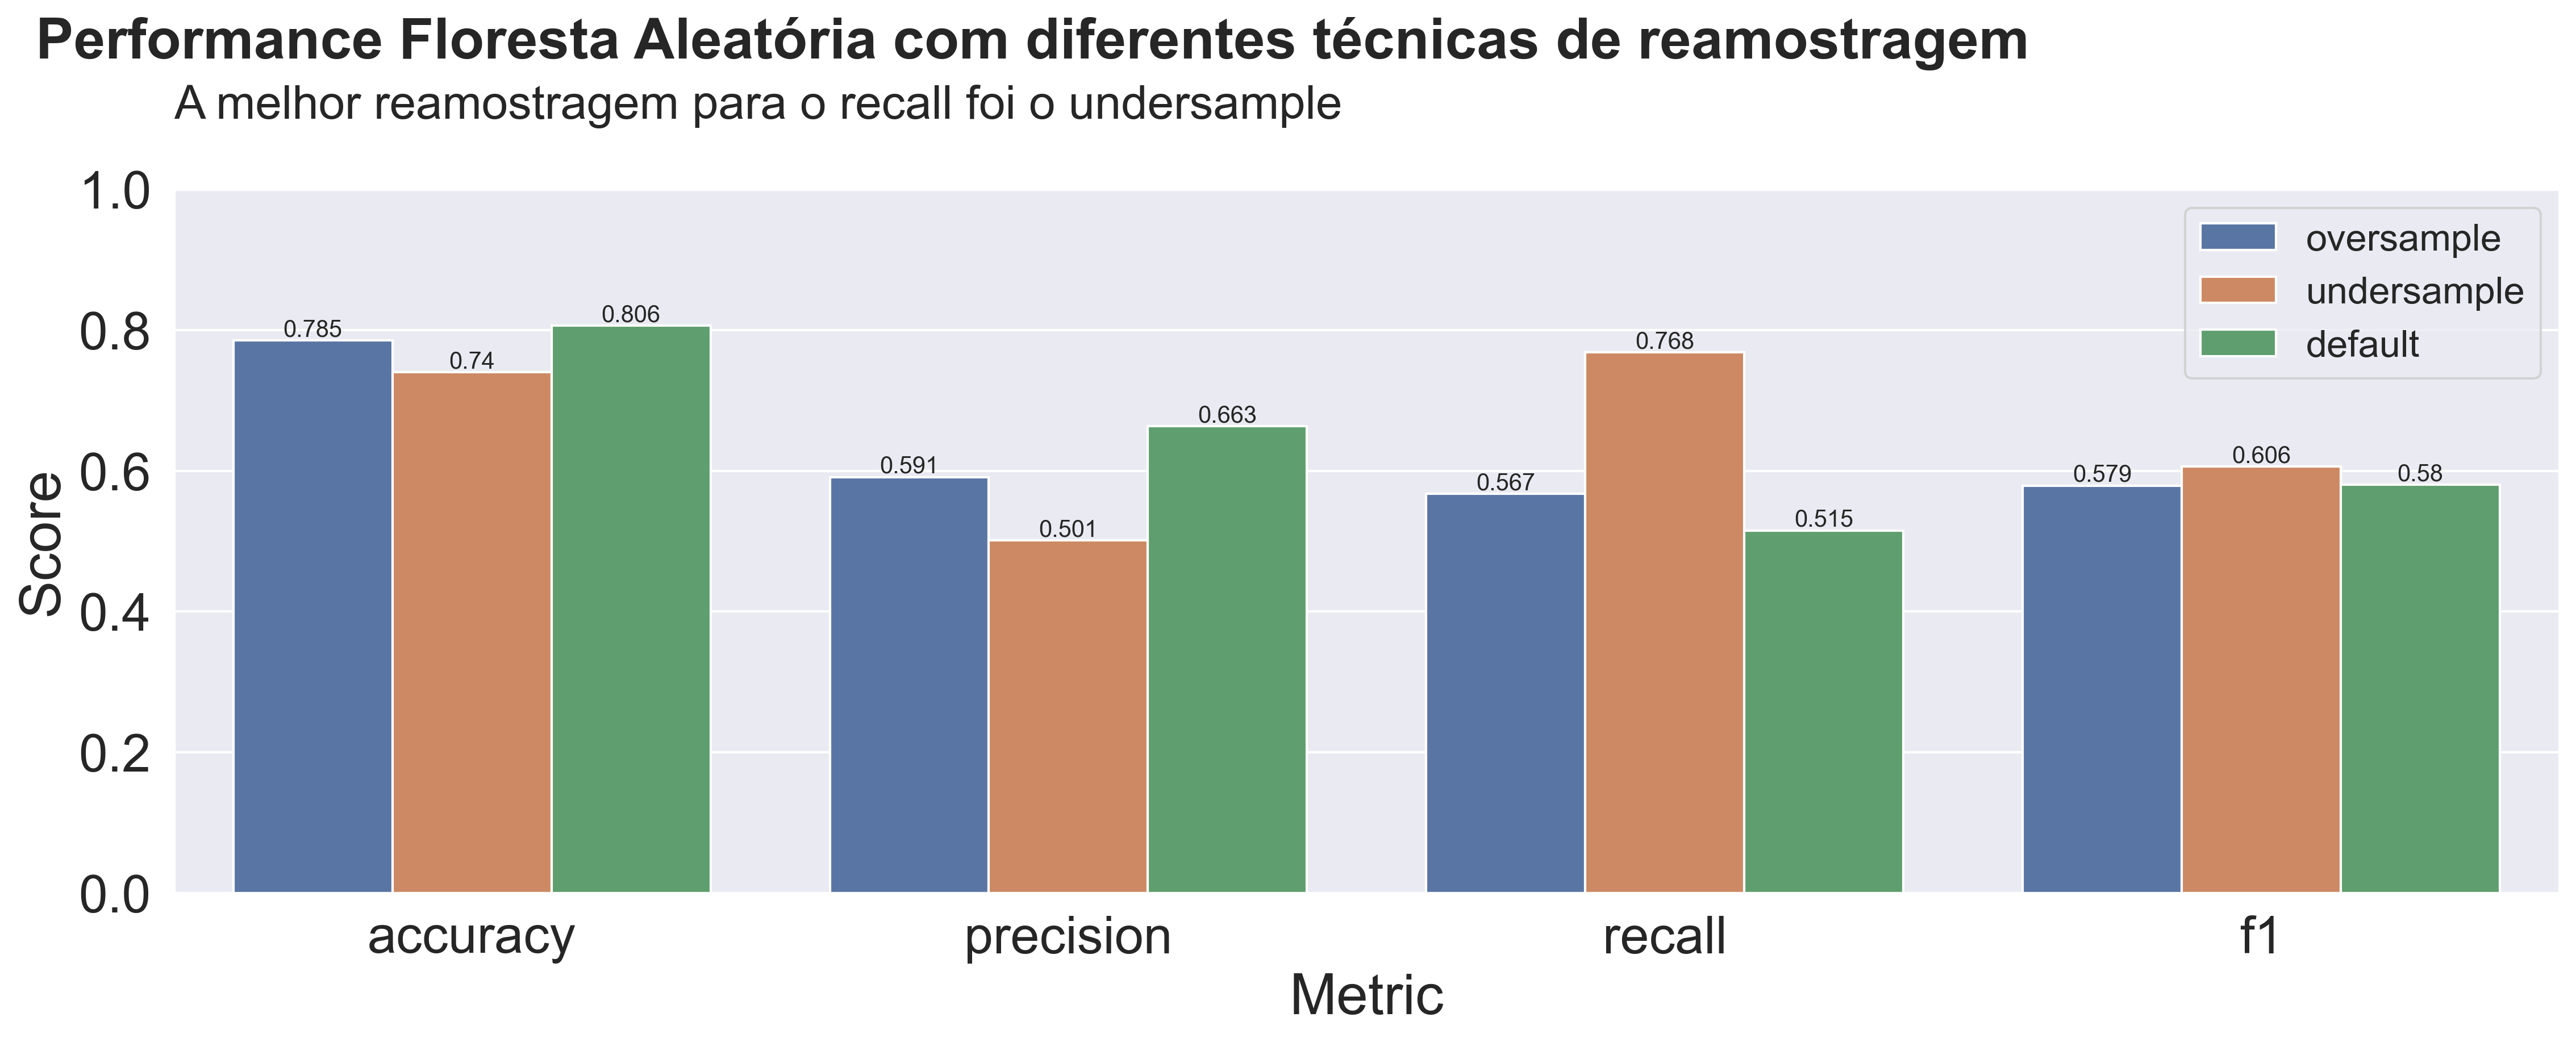

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(15,6), dpi=300, constrained_layout=True)
plt.suptitle(
    'Performance Floresta Aleatória com diferentes técnicas de reamostragem', weight='bold', fontsize=24, x=0.4
    )
plt.title('A melhor reamostragem para o recall foi o undersample', pad=30, loc='left', fontsize=20)
ax = sns.barplot(data=resampling_results, x='Metric', y='Score', hue='Resample')
plt.ylim((0, 1))
plt.legend(title='', fontsize=16)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
    plt.savefig('img/perf-resampling.png')
plt.show()

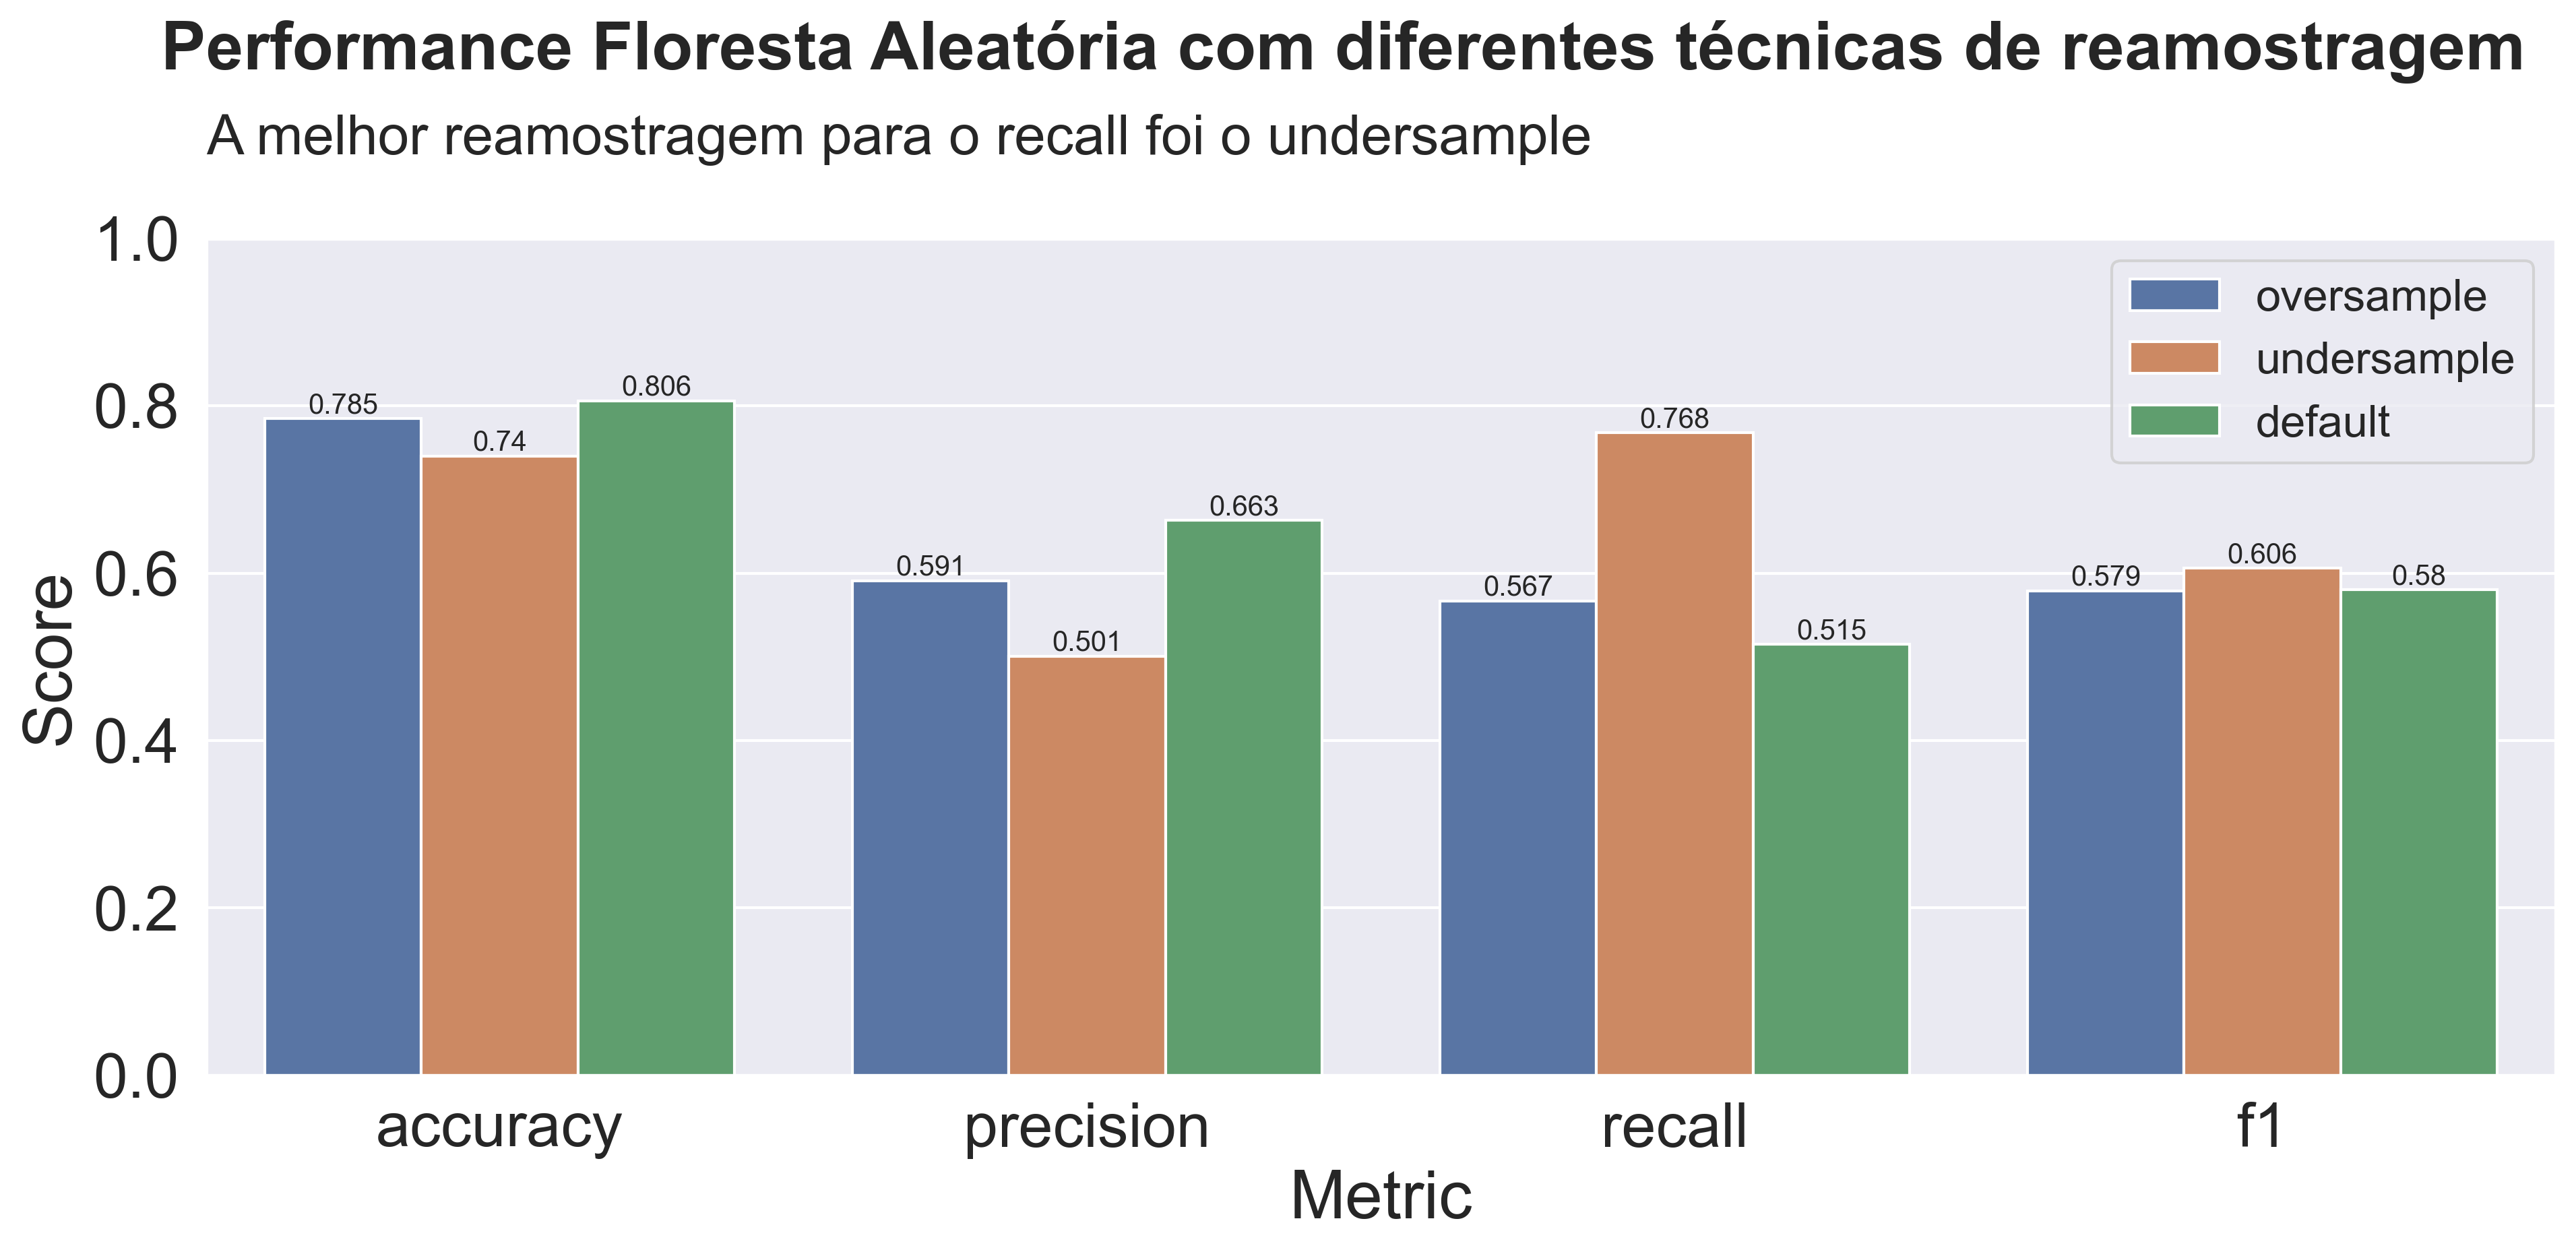

In [60]:
plt.figure(figsize=(15,6), dpi=300)
plt.suptitle('Performance Floresta Aleatória com diferentes técnicas de reamostragem', weight='bold', fontsize=24)
plt.title('A melhor reamostragem para o recall foi o undersample', pad=30, loc='left', fontsize=20)
plt.subplots_adjust(top=0.8)
ax = sns.barplot(data=resampling_results, x='Metric', y='Score', hue='Resample')
plt.ylim((0, 1))
plt.legend(title='', fontsize=16)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
plt.show()

# Tunando Árvore de decisão

Vamos tunar o nosso modelo de Floresta Aleatória

In [61]:
rf_model_over.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'maxBins': 256,
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'minBinSize': 1,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [62]:
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [63]:
from sklearn.metrics import precision_score

In [64]:
param_grid = {
    'min_samples_leaf': [i for i in range (1, 15)],
    'min_samples_split': [i for i in range(2, 15)],
    'max_leaf_nodes': [i for i in range(30, 50)]
}

In [65]:
# grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

In [66]:
#grid_search.fit(X_train_oversam, y_train_oversam)

In [67]:
param_random = {
    'n_estimators': [i for i in range(120, 181, 5)],
    'min_samples_leaf': [i for i in range (1, 15)],
    'min_samples_split': [i for i in range(4, 10)],
    'max_leaf_nodes': [i for i in range(100, 181, 5)],
    'random_state': [42]
}

In [68]:
random_search = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = param_random,
    cv = 5,
    n_jobs = -1,
    scoring='recall',
    n_iter=60,
    random_state=42,
    refit=True,
    verbose=3
)

In [69]:
%%time
random_search.fit(X_train_undersam, y_train_undersam)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: total: 1.78 s
Wall time: 31.6 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'max_leaf_nodes': [100, 105, 110, 115,
                                                           120, 125, 130, 135,
                                                           140, 145, 150, 155,
                                                           160, 165, 170, 175,
                                                           180],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14],
                                        'min_samples_split': [4, 5, 6, 7, 8, 9],
                                        'n_estimators': [120, 125, 130, 135,
                                                         140, 145, 150, 155,
                                                         160, 165, 170, 175,
                                                         180],
                                        'random_state': [42]},
                   random_state=42, scoring='recall', verbose=3)

In [70]:
random_search.best_params_

{'random_state': 42,
 'n_estimators': 180,
 'min_samples_split': 5,
 'min_samples_leaf': 11,
 'max_leaf_nodes': 125}

In [71]:
random_search.best_score_

0.8089390919158361

In [72]:
def plot_params_results(search_selector, ignore_params=[]):
    params_df = pd.DataFrame(search_selector.cv_results_['params'])
    params_df.drop(ignore_params, axis=1, inplace=True)
    params_df['score'] = search_selector.cv_results_['mean_test_score']
    for col in params_df.columns[:-1]:
        if params_df[col].dtype == 'object':
            plt.figure(figsize=(12,6))
            #fig, ax = plt.subplots(figsize=(12, 6))
            #sns.catplot(data=params_df, x=col, y='score', ci=None, ax=ax)
            sns.stripplot(data=params_df, x=col, y='score')
        else:
            plt.figure(figsize=(12,6))
            sns.lineplot(data=params_df, x=col, y='score', ci=None)
        plt.show()
    return params_df

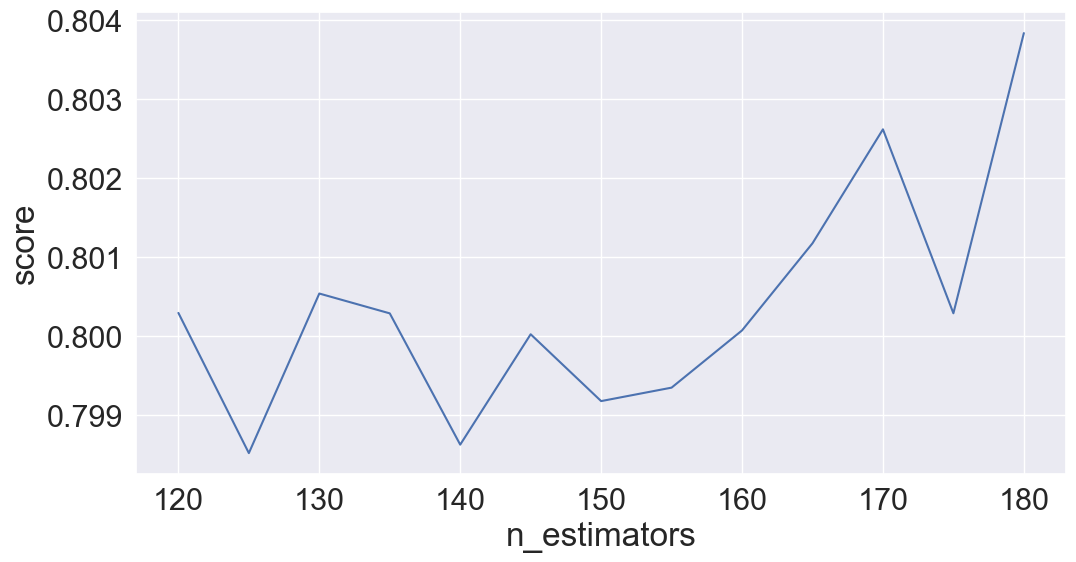

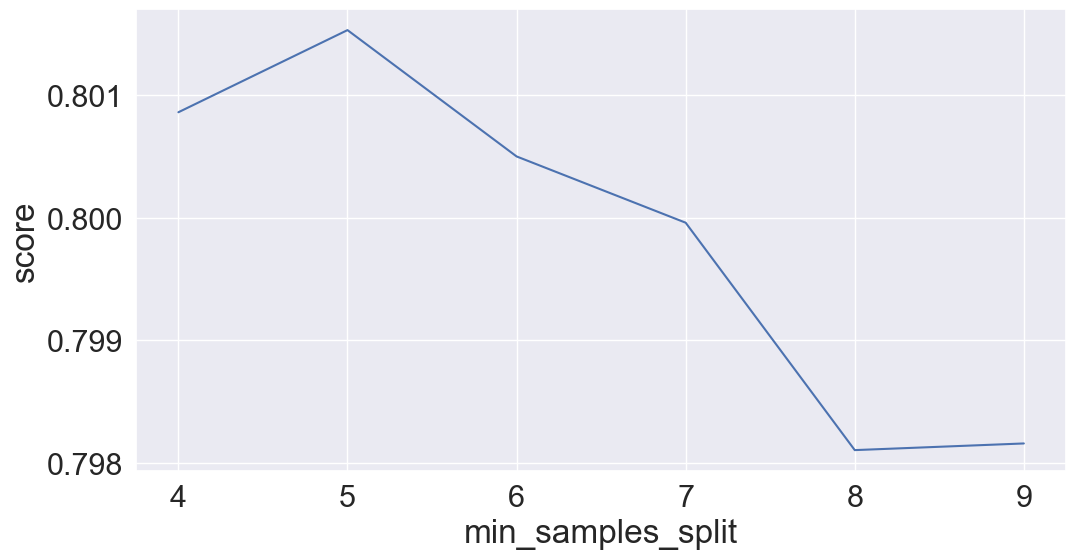

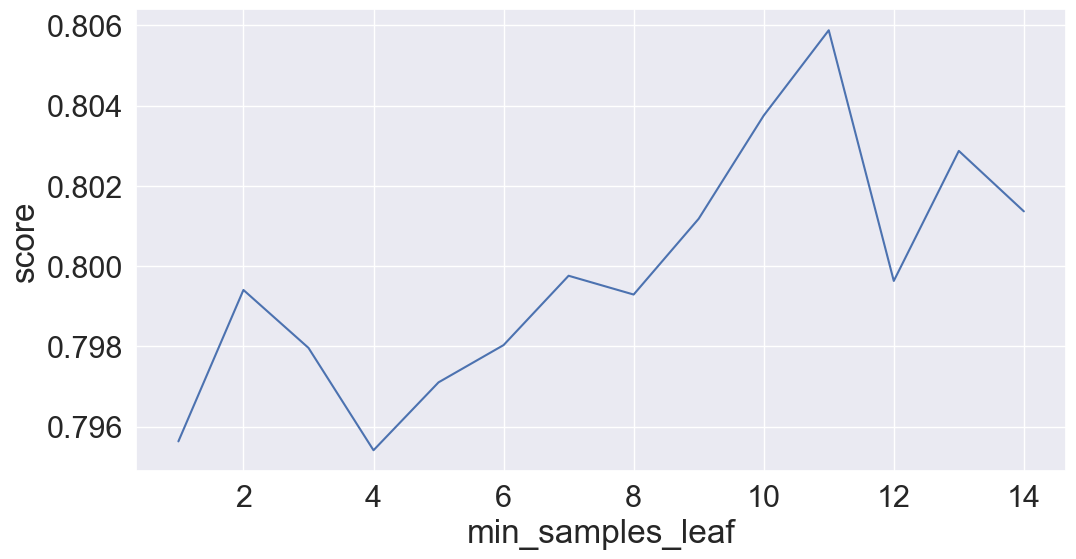

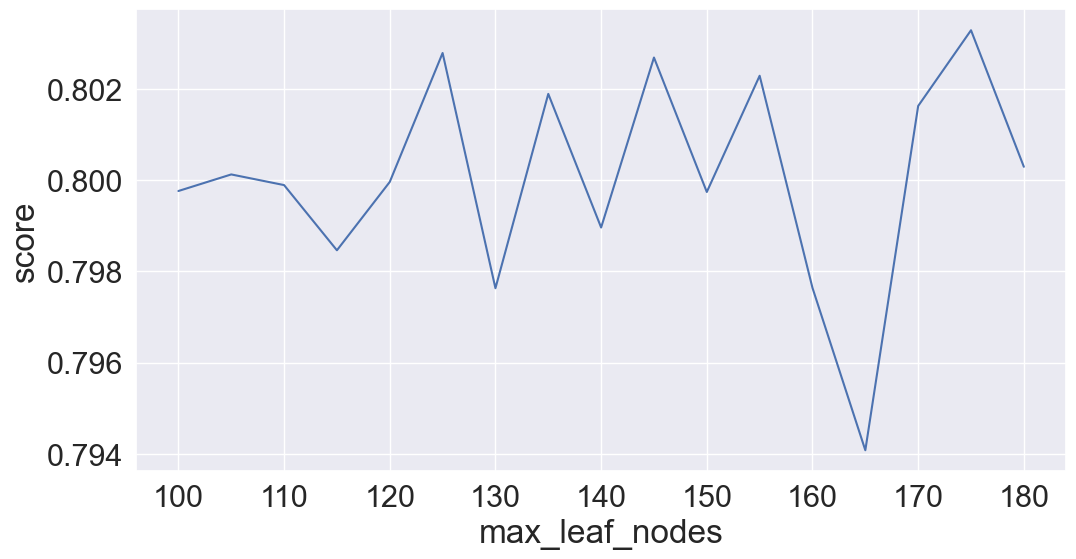

In [73]:
params_df = plot_params_results(random_search, ignore_params=['random_state'])

In [74]:
y_pred = random_search.best_estimator_.predict(X_test)

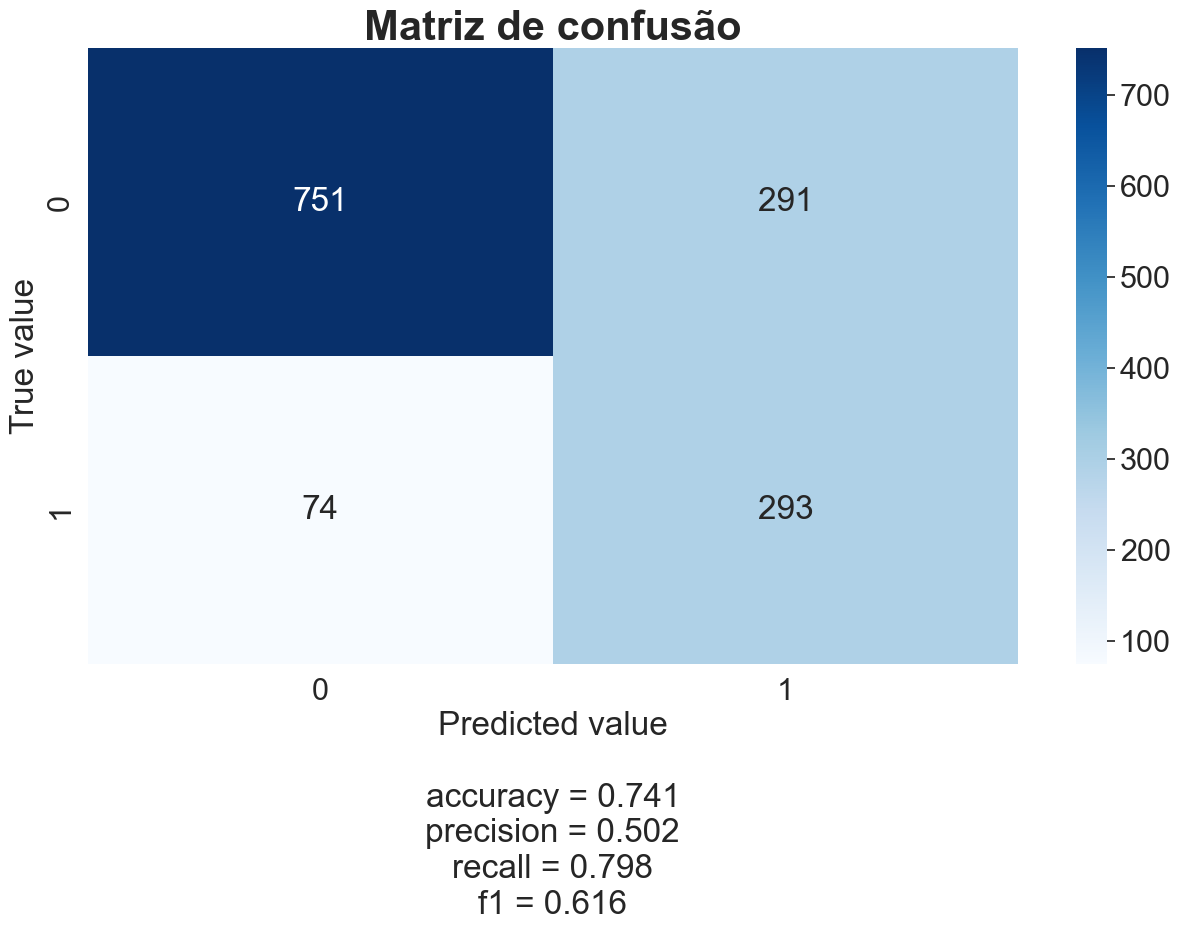

In [75]:
plot_confusion_matrix(y_test, y_pred, random_search.best_estimator_.classes_, pos_label=1)

### Melhor modelo árvore

In [76]:
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    min_samples_leaf=2,
    min_samples_split=6,
    n_estimators=25,
    random_state=42)

In [77]:
best_rf_model = RandomForestClassifier(
    **random_search.best_params_
)

In [78]:
best_rf_model.fit(X_train_undersam, y_train_undersam)

RandomForestClassifier(max_leaf_nodes=125, min_samples_leaf=11,
                       min_samples_split=5, n_estimators=180, random_state=42)

In [79]:
y_pred_rf_optimized = best_rf_model.predict(X_test)

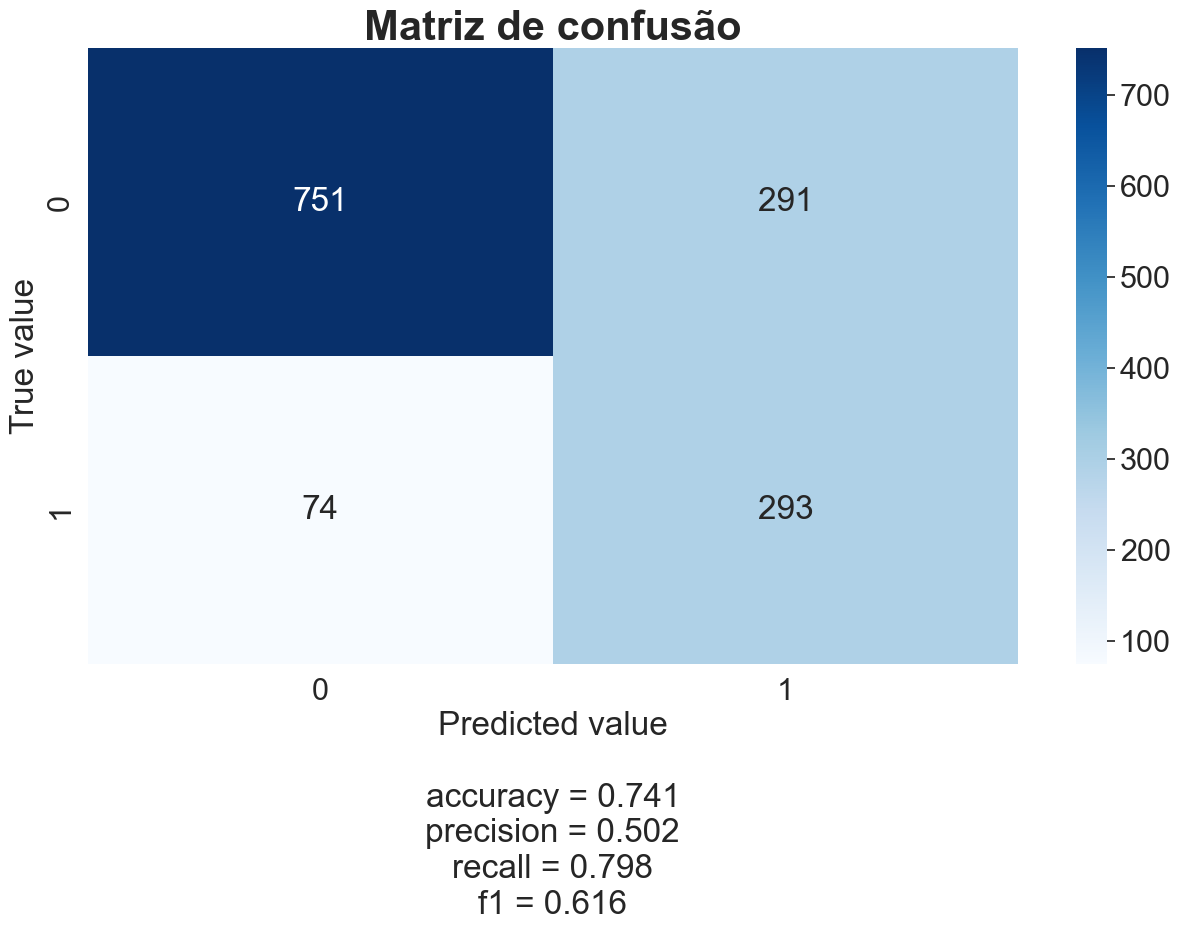

In [80]:
plot_confusion_matrix(y_test, y_pred, best_rf_model.classes_)

# XGBoost

In [81]:
from xgboost import XGBClassifier

In [82]:
(y_train == 0).sum() / (y_train == 1).sum()

2.7509986684420773

In [83]:
scale_positive_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [84]:
xgb_model = XGBClassifier(random_state=42, booster='gblinear', eval_metric='aucpr', eta=0.001)

In [85]:
%%time
xgb_model.fit(X_train_undersam, y_train_undersam)

CPU times: total: 859 ms
Wall time: 274 ms


XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.001, eval_metric='aucpr',
              gamma=None, gpu_id=-1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, predictor=None, random_state=42,
              reg_alpha=0, ...)

In [86]:
y_pred = xgb_model.predict(X_test)

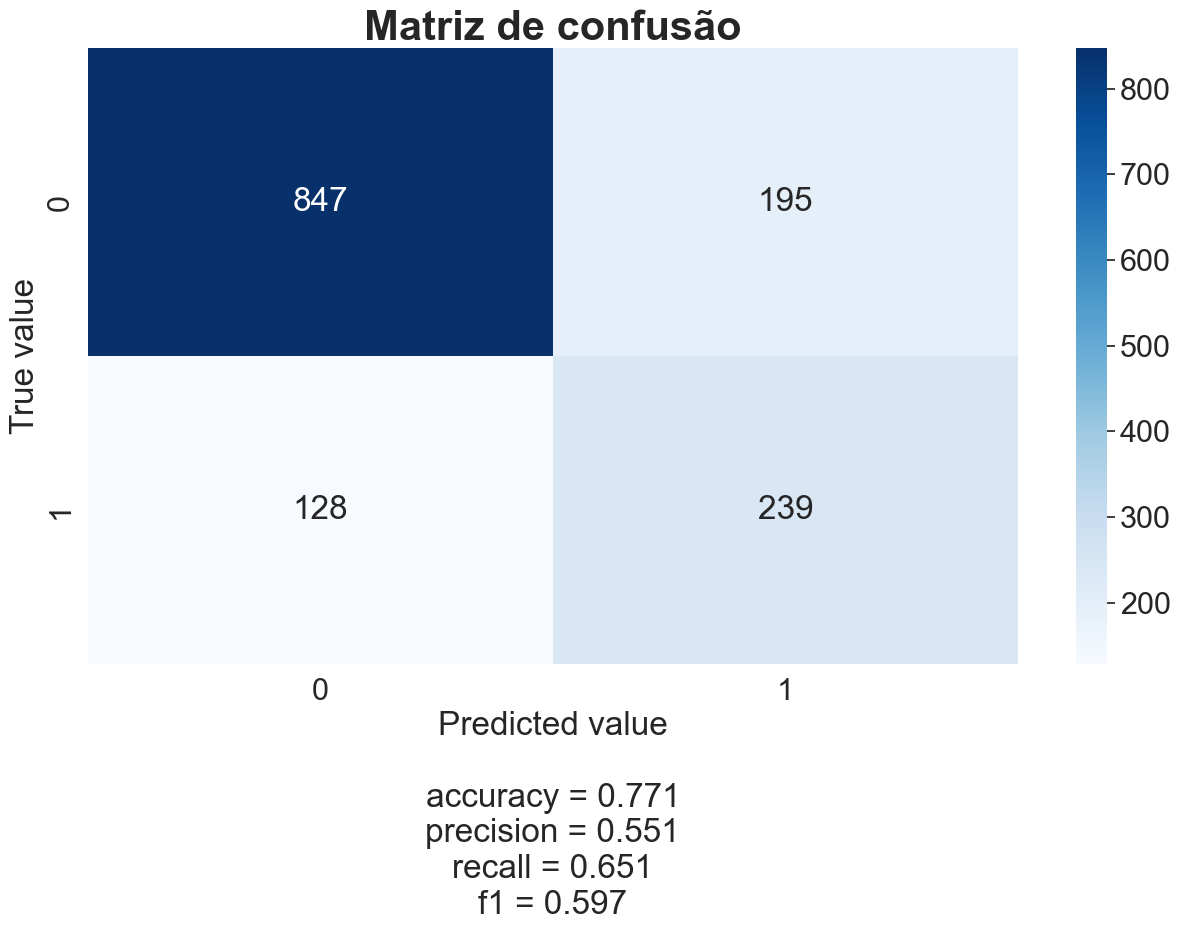

In [87]:
plot_confusion_matrix(y_test, y_pred, xgb_model.classes_,)

In [88]:
gen_feature_importances(xgb_model, preprocessing.get_feature_names_out())

,importância
feature,
cat__Contract,0.306385
num__tenure,0.273635
cat__Dependents,0.218135
cat__OnlineSecurity,0.160503
num__TotalCharges,0.154282
cat__TechSupport,0.148510
cat__Partner,0.111599
cat__OnlineBackup,0.087704
cat__DeviceProtection,0.068204


### Tunando XGBoost

In [89]:
xgb_params = {
    'booster': ['gbtree', 'gblinear', 'dart'],
}

# Regressão Logística

In [90]:
from sklearn.linear_model import LogisticRegressionCV

In [91]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
lr_model_over = LogisticRegressionCV(random_state=42, cv=5, scoring='recall')

In [93]:
%%time
lr_model_over.fit(X_train_undersam, y_train_undersam)

CPU times: total: 703 ms
Wall time: 329 ms


LogisticRegressionCV(cv=5, random_state=42, scoring='recall')

In [94]:
%%time
y_pred = lr_model_over.predict(X_test)

CPU times: total: 46.9 ms
Wall time: 2 ms


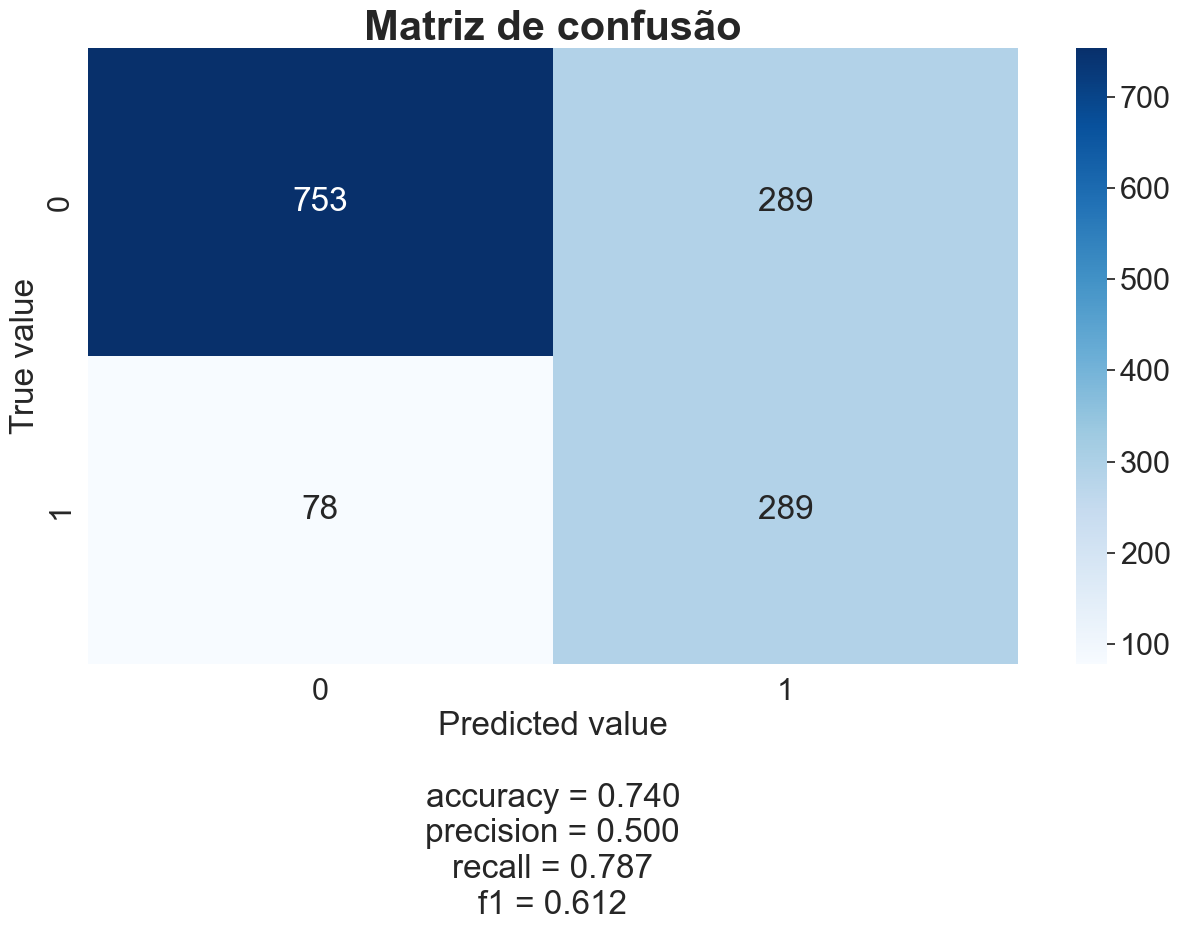

In [95]:
plot_confusion_matrix(y_test, y_pred, lr_model_over.classes_)

## SVC

In [96]:
from sklearn.svm import SVC

In [97]:
model_svm = SVC(kernel='linear', random_state=42) 

In [98]:
%%time
model_svm.fit(X_train_undersam,y_train_undersam)

CPU times: total: 844 ms
Wall time: 478 ms


SVC(kernel='linear', random_state=42)

In [99]:
y_pred_svc = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred_svc)

0.7097232079489

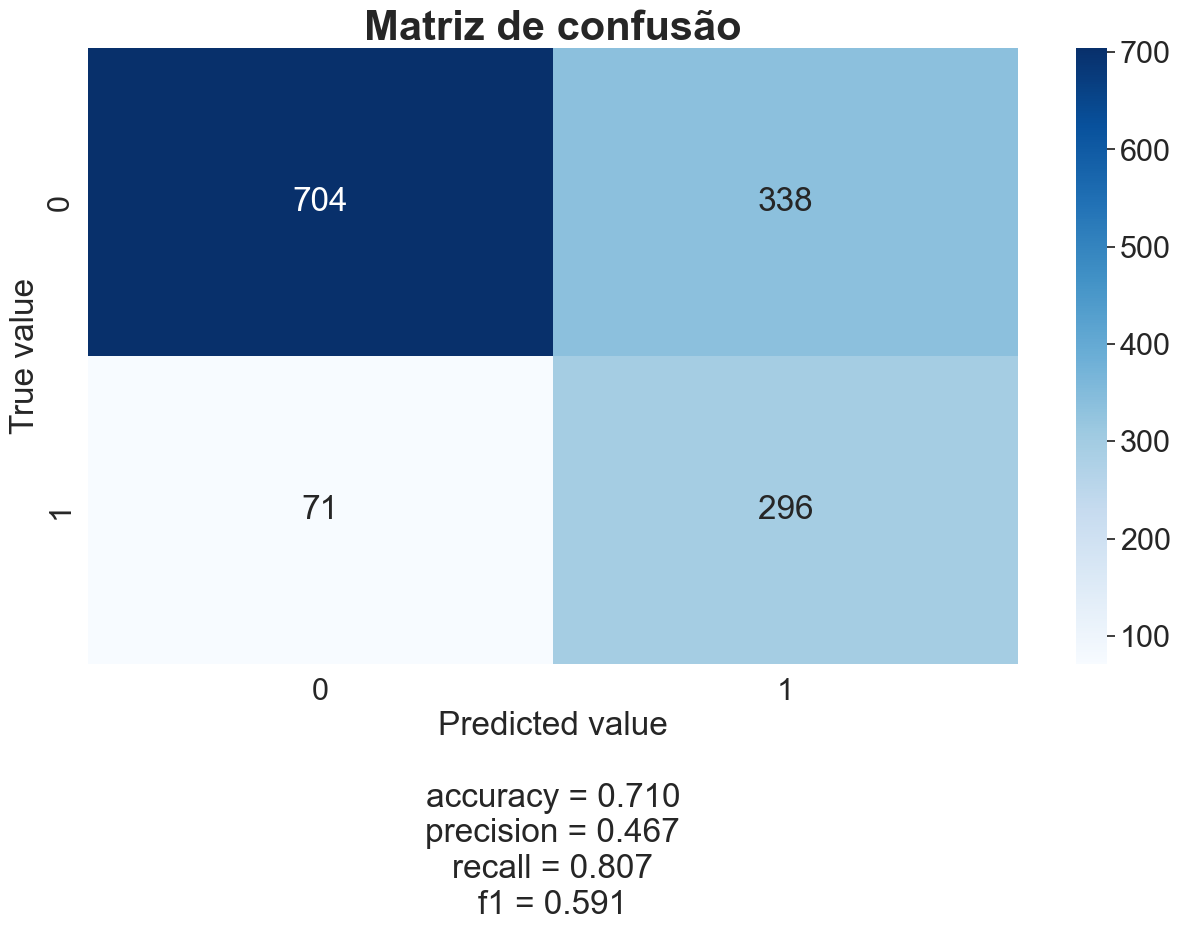

In [100]:
plot_confusion_matrix(y_test, y_pred_svc, model_svm.classes_)

In [101]:
def gen_feature_importances_svm(model_, feature_names):
    """
    Generate feature importances DataFrame
    
    Parameters
    ----------
    model_: Scikit-learn model
    
    feature_names: list of str
    
    Returns
    -------
    pd.DataFrame
    """
    return (pd.DataFrame({'feature': feature_names, 'importância': model_.coef_[0]})
                    .sort_values(by=['importância'], ascending=False)
                   .set_index('feature'))

In [102]:
gen_feature_importances_svm(model_svm, preprocessing.get_feature_names_out())

,importância
feature,
num__TotalCharges,0.895690
num__MonthlyCharges,0.593318
cat__PaperlessBilling,0.240899
num__SeniorCitizen,0.054423
cat__Partner,0.031937
cat__PaymentMethod,0.011581
cat__MultipleLines,-0.013170
cat__gender,-0.028523
cat__DeviceProtection,-0.036922


### Tunando SVC

In [103]:
svc_params = {
    'C': [0.1, 0.3, 1, 3, 9, 12, 15],
    'gamma': [1,0.1,0.01,0.001, 'scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [n for n in range(1, 15)],
    'random_state': [42,]
}

In [104]:
svc_params = [
    {

        'C': [0.1, 0.3, 1, 3, 9, 12, 15],
        # Gamma works for rfb, sigmoid and poly kernels
        'gamma': [1,0.1,0.01,0.001, 'scale', 'auto'],
        'kernel': ['rbf', 'sigmoid'],
        'random_state': [42,]
    },

    {
        'C': [0.1, 0.3, 1, 3, 9, 12, 15],
        # Gamma works only for rfb, sigmoid and poly kernels
        'gamma': [1,0.1,0.01,0.001, 'scale', 'auto'],
        'kernel': ['poly'],
        # Degree works only for poly kernel
        'degree': [n for n in range(1, 15)],
        'random_state': [42,]
    },

    {
    'C': [0.1, 0.3, 1, 3, 9, 12, 15],
    'kernel': ['linear'],
    'random_state': [42,]
    }

    ]


In [105]:
random_search = RandomizedSearchCV(
    estimator = SVC(verbose=True),
    param_distributions = svc_params,
    cv = 5,
    n_jobs = -1,
    scoring='recall',
    n_iter=30,
    random_state=42,
    refit=True,
    verbose=3
)

In [106]:
%%time
# Essa célula demora muito para rodar
random_search.fit(X_train_undersam, y_train_undersam)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 1.5 s
Wall time: 16min 39s


RandomizedSearchCV(cv=5, estimator=SVC(verbose=True), n_iter=30, n_jobs=-1,
                   param_distributions=[{'C': [0.1, 0.3, 1, 3, 9, 12, 15],
                                         'gamma': [1, 0.1, 0.01, 0.001, 'scale',
                                                   'auto'],
                                         'kernel': ['rbf', 'sigmoid'],
                                         'random_state': [42]},
                                        {'C': [0.1, 0.3, 1, 3, 9, 12, 15],
                                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14],
                                         'gamma': [1, 0.1, 0.01, 0.001, 'scale',
                                                   'auto'],
                                         'kernel': ['poly'],
                                         'random_state': [42]},
                                        {'C': [0.1, 0.3, 1, 3, 9, 12, 15],
                                         'kernel': ['linear'],
                                         'random_state': [42]}],
                   random_state=42, scoring='recall', verbose=3)

In [107]:
random_search.cv_results_['mean_test_score']

array([0.73569214, 0.83357032, 0.59654485, 0.6970897 , 0.85887486,
       0.8448948 , 0.80028793, 0.6       , 0.78231672, 0.76034994,
       0.8102835 , 0.6       , 0.77697453, 0.79430565, 0.87886822,
       0.73637209, 0.83425249, 0.81694131, 0.85422148, 0.63120044,
       0.75769214, 0.75832558, 0.81027243, 0.6       , 0.6       ,
       0.82159911, 0.64183167, 0.85754596, 0.79096567, 0.76366334])

In [108]:
random_search.best_score_

0.8788682170542635

In [109]:
random_search.best_params_

{'random_state': 42, 'kernel': 'poly', 'gamma': 'auto', 'degree': 8, 'C': 0.1}

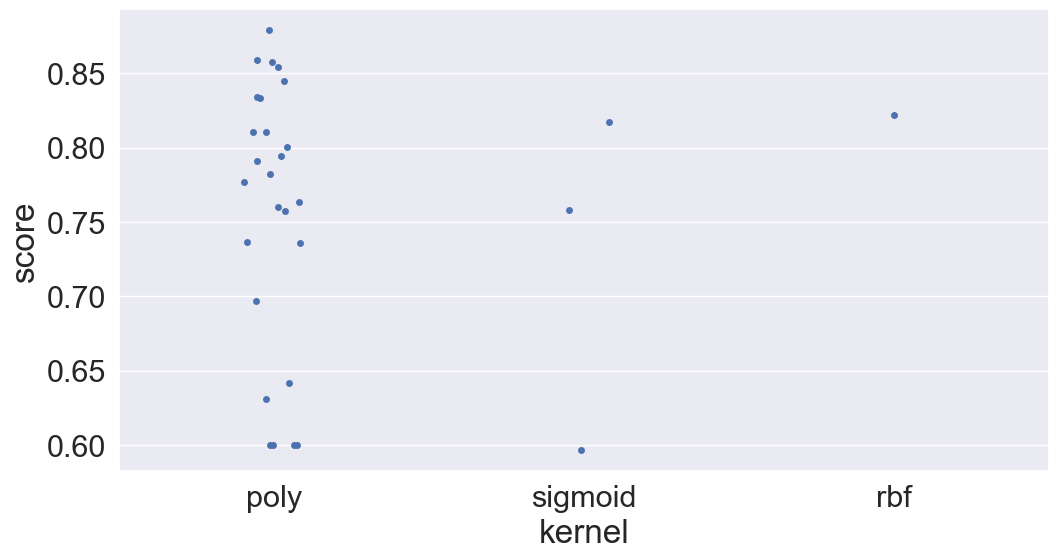

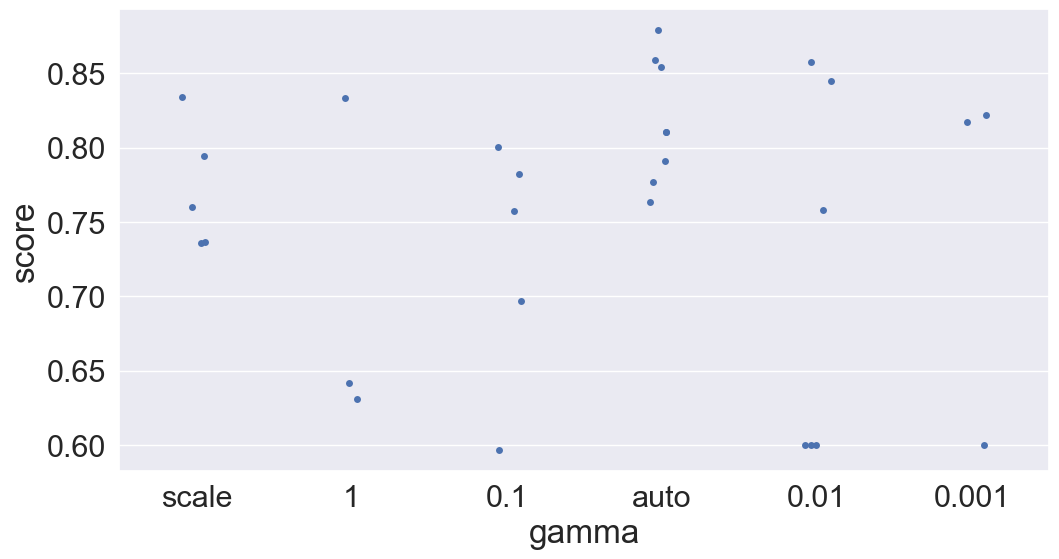

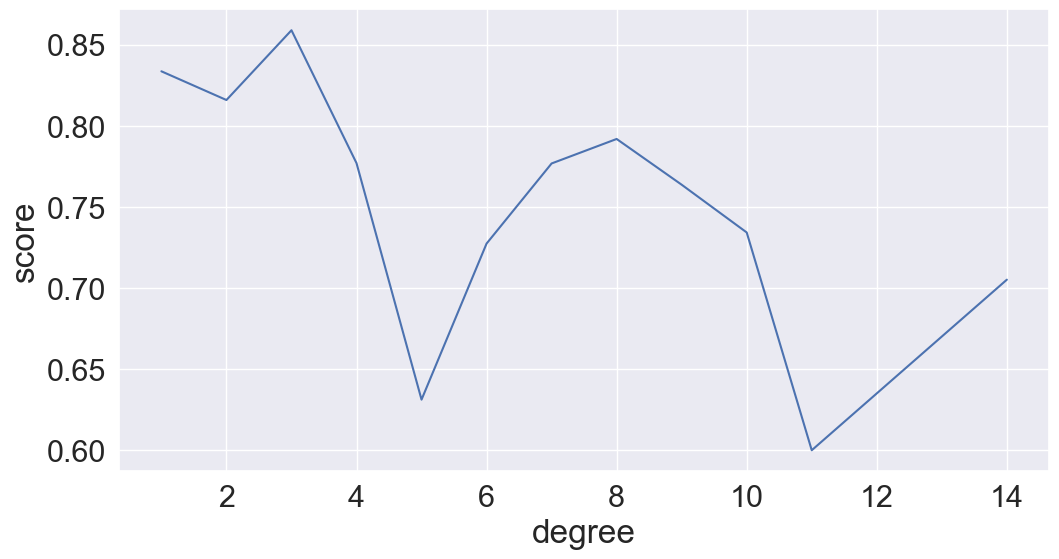

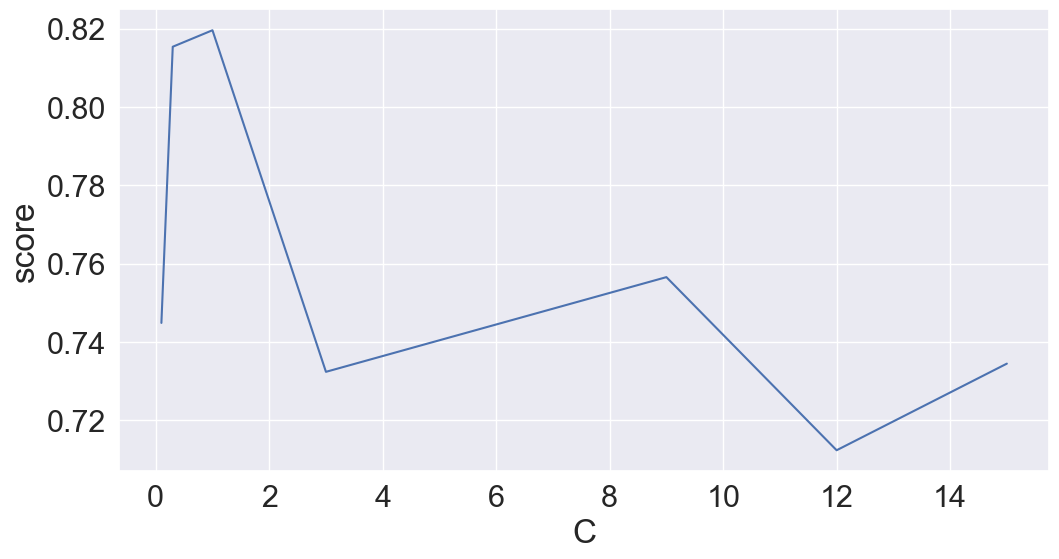

In [110]:
params_df = plot_params_results(random_search, ignore_params=['random_state'])

In [111]:
params_df[params_df.kernel == 'poly'].sort_values('score', ascending=False)

,kernel,gamma,degree,C,score
14,poly,auto,8.0,0.1,0.878868
4,poly,auto,3.0,0.1,0.858875
27,poly,0.01,2.0,1.0,0.857546
18,poly,auto,7.0,0.3,0.854221
5,poly,0.01,2.0,3.0,0.844895
16,poly,scale,7.0,0.3,0.834252
1,poly,1,1.0,3.0,0.833570
10,poly,auto,10.0,1.0,0.810283
22,poly,auto,14.0,1.0,0.810272
6,poly,0.1,2.0,1.0,0.800288


### Melhor modelo SVC

In [112]:
best_svc_model = SVC(
    **random_search.best_params_
)

In [113]:
best_svc_params = {'random_state': 42, 'kernel': 'poly', 'gamma': 0.001, 'degree': 1, 'C': 0.3}

In [114]:
best_svc_model = SVC(
    **best_svc_params
)

In [115]:
best_svc_model.fit(X_train_undersam, y_train_undersam)

SVC(C=0.3, degree=1, gamma=0.001, kernel='poly', random_state=42)

In [116]:
y_pred_svc_optimized = best_svc_model.predict(X_test)

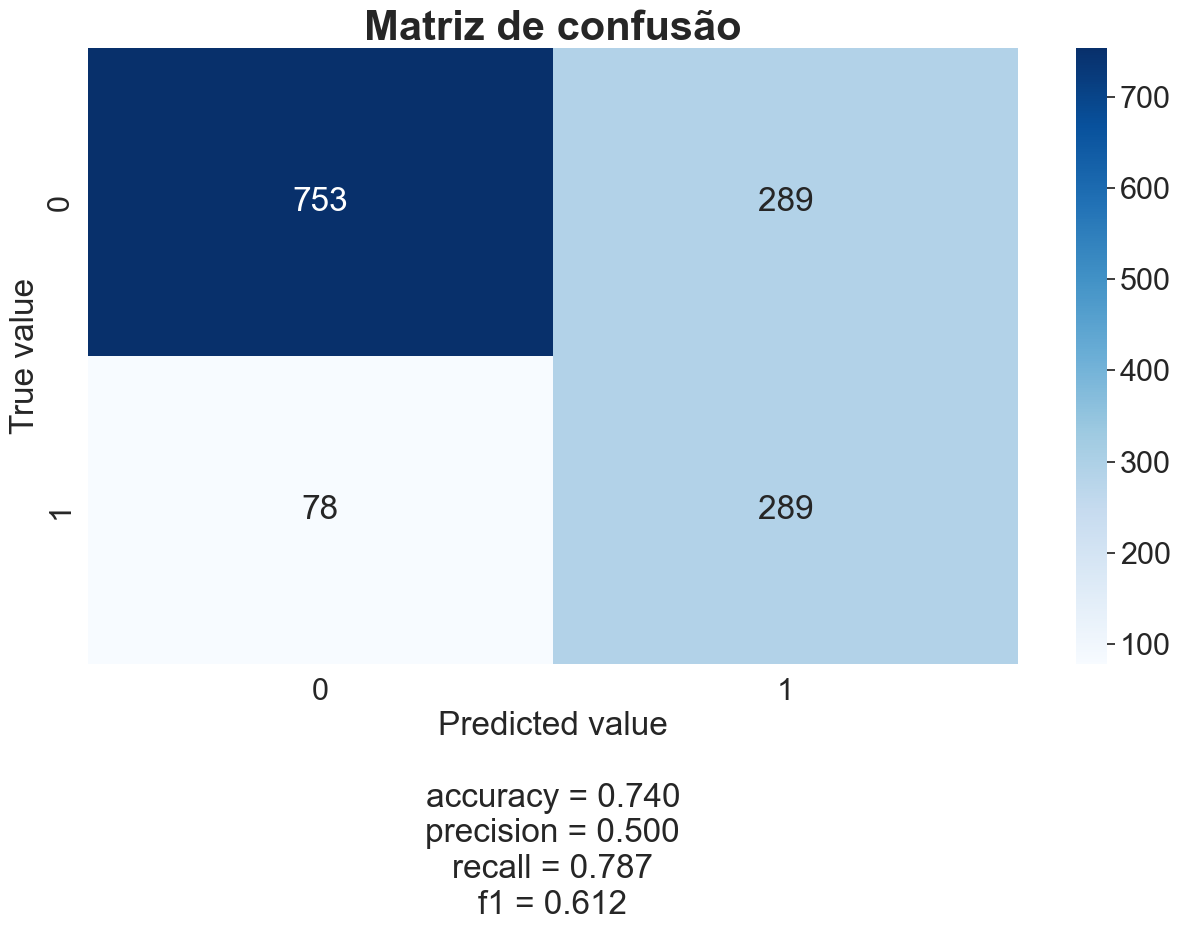

In [117]:
plot_confusion_matrix(y_test, y_pred, best_svc_model.classes_)

In [126]:
def calcululate_metrics(y_test_, y_pred_, pos_label=1):
    return (
    round(metrics.accuracy_score(y_test_, y_pred_), 3),
    round(metrics.precision_score(y_test_, y_pred_, pos_label=pos_label), 3),
    round(metrics.recall_score(y_test_, y_pred_, pos_label=pos_label), 3),
    round(metrics.f1_score(y_test_, y_pred_, pos_label=pos_label), 3)
    )

In [127]:
metrics_list = ['accuracy', 'precision', 'recall', 'f1']
tree_result = calcululate_metrics(y_test, y_pred_tree)
rf_result = calcululate_metrics(y_test, y_pred_rf)
svc_result = calcululate_metrics(y_test, y_pred_svc)

In [128]:
models_results = pd.DataFrame(
    {
        'Model': ['Árvore']*4 + ['Floresta Aleatória']*4 + ['SVC']*4,
        'Metric': metrics_list*3,
        'Score': tree_result + rf_result + svc_result
    }
)

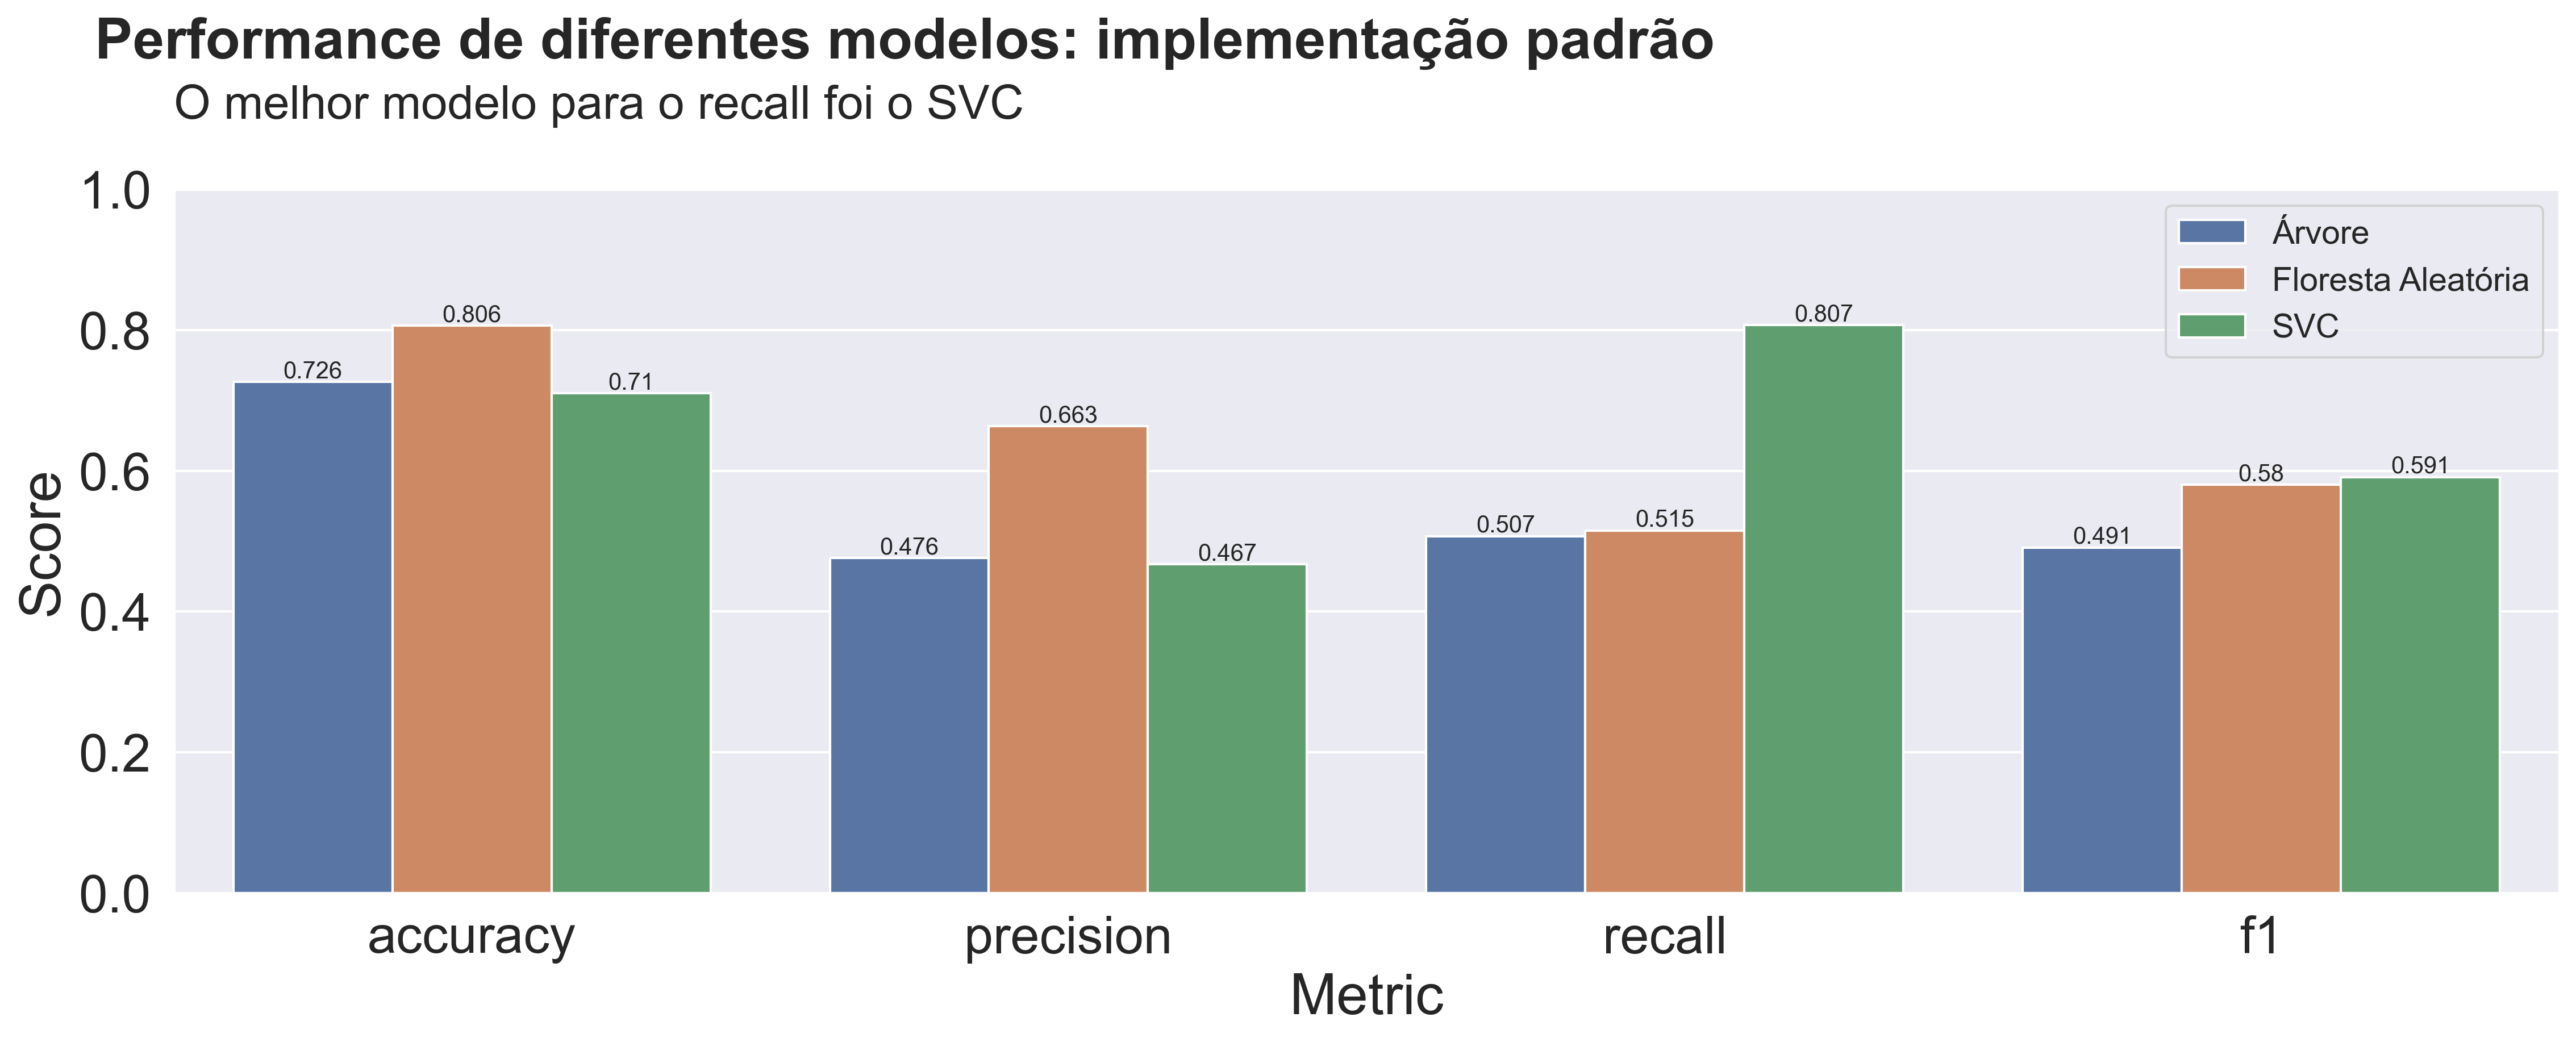

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(15,6), dpi=300, constrained_layout=True)
plt.suptitle('Performance de diferentes modelos: implementação padrão', weight='bold', fontsize=24, x=0.35)
plt.title('O melhor modelo para o recall foi o SVC', pad=30, loc='left', fontsize=20)
sns.barplot(data=models_results, x='Metric', y='Score', hue='Model', ax=ax)
plt.ylim((0, 1))
plt.legend(title='', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
plt.savefig('img/perf-models-standard.png')
plt.show()

In [140]:
metrics_list = ['accuracy', 'precision', 'recall', 'f1']
rf_result = calcululate_metrics(y_test, y_pred_rf)
rf_opt_result = calcululate_metrics(y_test, y_pred_rf_optimized)
svc_result = calcululate_metrics(y_test, y_pred_svc)
svc_opt_result = calcululate_metrics(y_test, y_pred_svc_optimized)

In [141]:
models_results = pd.DataFrame(
    {
        'Model': ['Floresta Aleatória']*4 + ['Floresta Aleatória Tunada']*4 + ['SVC']*4 + ['SVC Tunado']*4,
        'Metric': metrics_list*4,
        'Score': rf_result + rf_opt_result + svc_result + svc_opt_result
    }
)

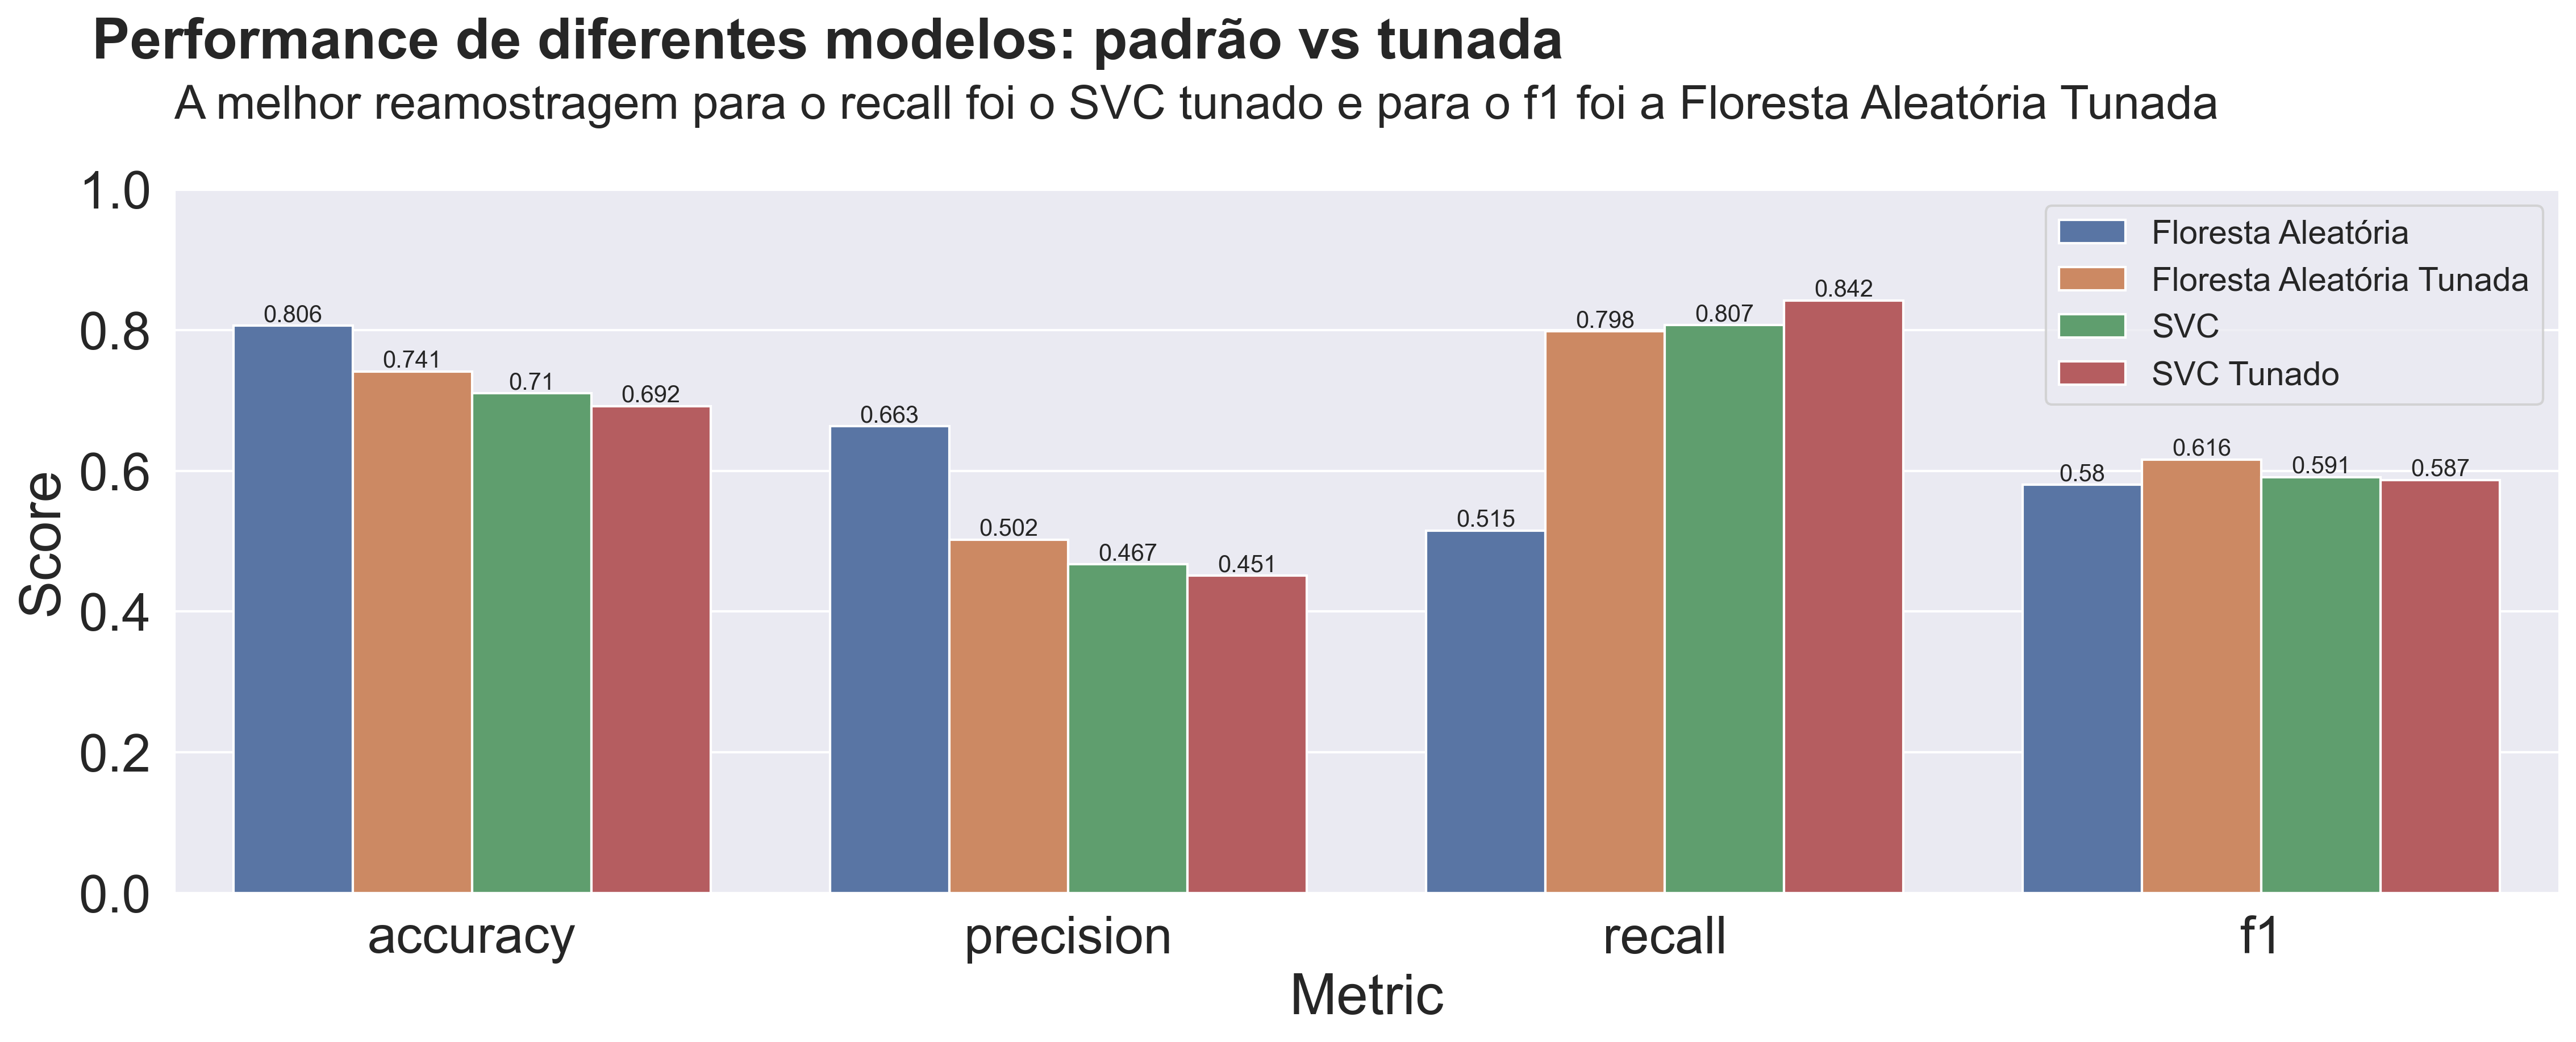

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(15,6), dpi=300, constrained_layout=True)
plt.suptitle('Performance de diferentes modelos: padrão vs tunada', weight='bold', fontsize=24, x=0.32)
plt.title('A melhor reamostragem para o recall foi o SVC tunado e para o f1 foi a Floresta Aleatória Tunada', pad=30, loc='left', fontsize=20)
#plt.subplots_adjust(top=0.8)
sns.barplot(data=models_results, x='Metric', y='Score', hue='Model', ax=ax)
plt.ylim((0, 1))
plt.legend(title='', fontsize=14)
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
plt.savefig('img/perf-models-tuned.png')
plt.show()